<a href="https://colab.research.google.com/github/emilyclifton/ML-Mushrooms/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Background:
###Introduction
Mushrooms are a diverse group of fungi that have been apart of human diets and traditional medicines for centuries. The vast array of mushroom spieces presents both culinary delights and potential dangers, with certain mushrooms being highly toxic and even lethal if consummed. In this context, the ability to accurately identify whether a mushroom is edible or poisonous becomes paramount for the health of individuals who forage for mushrooms. Hopefully, with Machine Learning Algorithms this project will enchance the accuracy and efficiency of mushroom edibility classification.
###Literature Review
Historically, the identification of edible and poisonous mushrooms has relied on traditional knowledge passed down through generations. However, the limitations of this approach have become increasingly evident, prompting researchers to explore alternative methods. Previous literature has explored various techniques, including field guides, morphological characteristics, and chemical analyses, to distiguish between edible and poisonous mushrooms. Moreover, recent advancements in machine learning have offered new possibilities for automating and imporoving the accuracy of this classification process.
###Research Gaps
Despite the progress in traditional methods and the field of machine learning, there exists a notable research gap in developing robust models for mushroom edibility classification. The challenge lies in the dataset structure, where each mushroom species is labeled as definitely edible, definitely poisonous, or of unkown edibility and not recommended. The amalgamation of the "unkown edibility" class with the "poisonous" class introduces ambiguity, making it difficult to establish clear rules for identifying poisonous mushrooms based on available signs. This research gap calls for innovative approaches to address the inherent complexities within the dataset and improve the accuracy of edibility predictions.
###Challenges
One of the primary challenges in this project is navigating the dataset's classification nuances. The absence of distinct rules for identifying poisonous mushrooms poses a unique obstacle. Machine learning models must grapple with the uncertainty associated with the "unknown edibility" class, requiring strategies to enhance classification accuracy and mitigate the risks associated with false positives or false negatives. Overcoming these challenges is crucial to developing a reliable and practical tool for mushroom enthusiasts, foragers, and researchers alike.





##Project Description:

###Project Topic
This project aims to develop a machine learning model for the accurate classification of mushroom edibility. The dataset comprises descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms within the Agaricus and Lepiota Family. The challenge lies in effectively classifying these samples as definitely edible (e), definitely poisonous (p), or of unknown edibility and not recommended (combined with poisonous).

###Methodology
Employing advanced classification algorithms, such as neural networks or decision trees, the machine learning approach takes into account detailed descriptions of hypothetical samples. Variables such as cap shape, cap color, odor, gill size, and others derived from these descriptions contribute to the model's accuracy. Special attention is given to handling the "unknown edibility" class, taking into consideration the unique characteristics of the Agaricus and Lepiota Family samples.


###Data Resources
The dataset from the UC Irvine Machine Learning Repository provides comprehensive descriptions of hypothetical samples from 23 species of gilled mushrooms. Variables such as cap shape (bell, conical, convex, flat, knobbed, sunken), cap color (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow), and others offer detailed insights into the morphological and chemical features of each mushroom species.
https://archive.ics.uci.edu/dataset/73/mushroom


###Anticipated Outcomes
The anticipated outcomes include the development of a robust machine learning model capable of accurately classifying mushrooms within the Agaricus and Lepiota Family. Performance evaluation metrics, such as precision, recall, and F1 score, will provide a comprehensive assessment of the model's effectiveness. The analysis of specific variables derived from the hypothetical samples will contribute to a nuanced understanding of the features influencing mushroom edibility.

##Performance Metrics:
| Metric | Mathematical Expression | Explanation |
| ---------- | ----------- | ----------- |
| $Accuracy$ | $= \dfrac{TP+TN}{TP+TN+FP+FN}$ | Measures the overall correctness of the model. |
| $Precision$ | $= \dfrac{TP}{TP+FP}$ | Evaluates the accuracy of positive predictions. |
| $Recall$ | $= \dfrac{TP}{TP+TN}$ | Assesses the model's ability to identify positive instances. |
| $F1$ | $= \dfrac{2\cdot Precision\cdot Recall}{Precision+Recall}$ | Provides a balanced measure that considers both false positives and false negatives. |
| $AUC-ROC$ | Area under the Receiver Operating Characteristic | Measures the model's ability to distiguish between edible and posionous. |

## Basic Data Exploration

### Initialize workspace

In [3]:
# install the ucimlrepo package
!pip install ucimlrepo
!pip install scikit-learn-intelex

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# import scikit modules
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 14.6 MB/s eta 0:00:00


#### Load the Mushroom Dataset

In [4]:
# fetch mushroom dataset from UCI repo
mushroom_data = fetch_ucirepo(id=73)

# load dataset into pandas df
# X = mushroom.data.features
# y = mushroom.data.targets

X = pd.DataFrame(mushroom_data.data.features, columns=mushroom_data.feature_names)
y = pd.DataFrame(mushroom_data.data.targets, columns=mushroom_data.target_names)

# display(X.head())
# display(y.head())

mushrooms = pd.concat([X, y], axis=1)

display(mushrooms.head())
mushrooms.info()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [5]:
mushrooms.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [6]:
mushrooms.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

### Calculations and Evaluations for EDA Questions

#### 1. Distribution of Edible and Poisonous Mushrooms:
- What is the overall percentage of edible mushrooms in the dataset?
- The primary goal is to understand the overall distribution of edible and poisonous mushrooms in the dataset. This will provide insights into the balance between the two classes and set the foundation for further analysis.

Percentage of Edible Mushrooms: 51.80%


Text(0.5, 1.0, 'Distribution of Mushrooms Across Habitats')

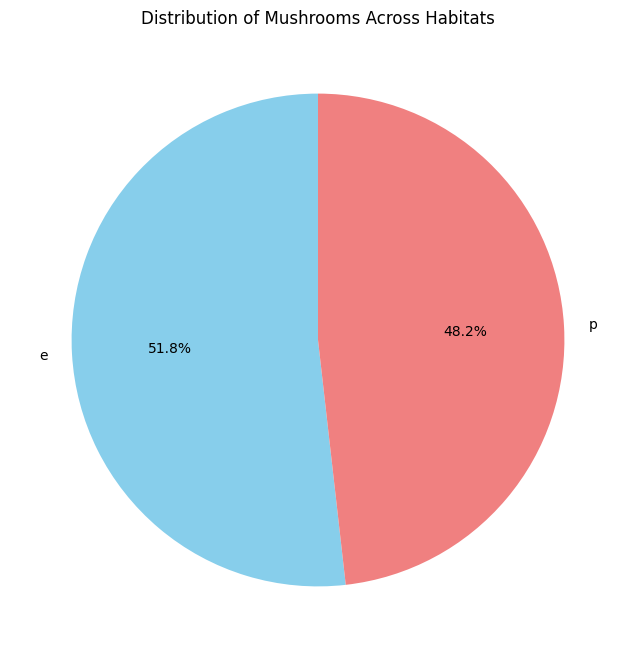

In [7]:
# 1. Distribution of Edible and Poisonous Mushrooms
# Calculate the overall percentage of edible mushrooms
edible = y['poisonous'].value_counts()
edible_percentage = edible / len(y) * 100
print(f"Percentage of Edible Mushrooms: {edible_percentage.get('e', 0):.2f}%")

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(edible, labels=edible.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue'])
plt.title('Distribution of Mushrooms Across Habitats')

__Answer__: The dataset has a balanced distribution of edible and poisonous mushrooms, with approximately 51.8% being edible.

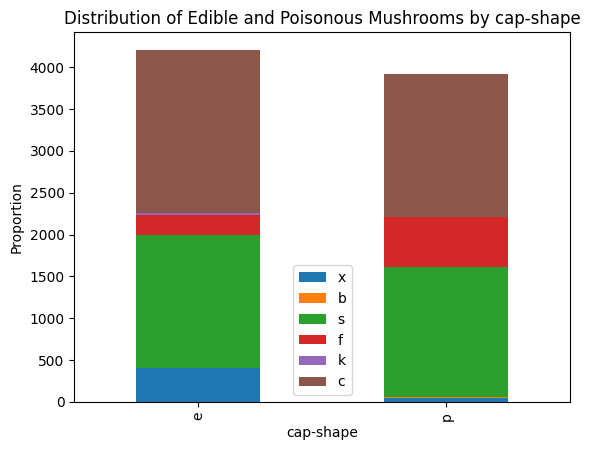

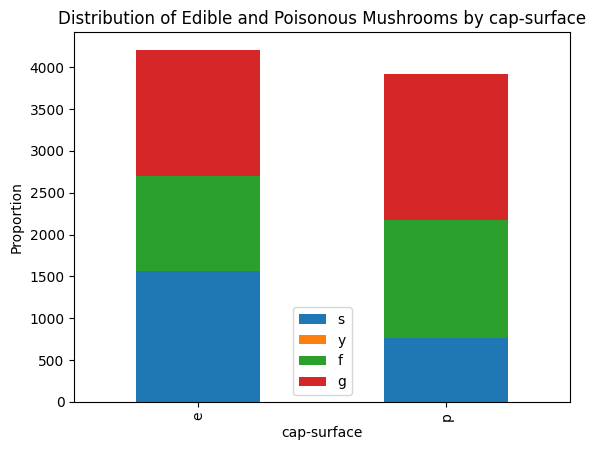

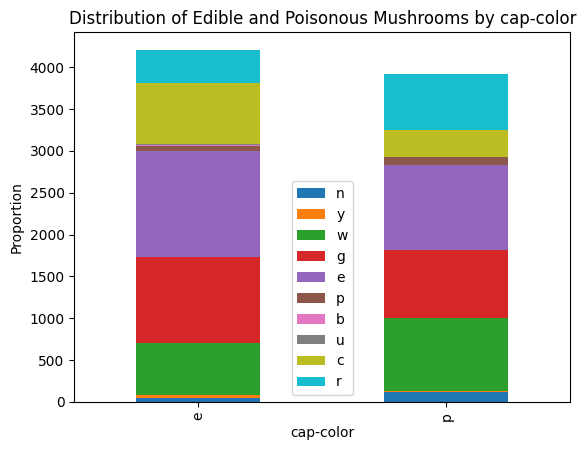

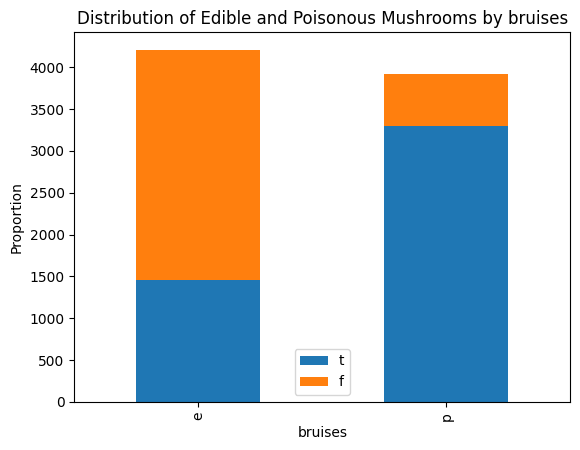

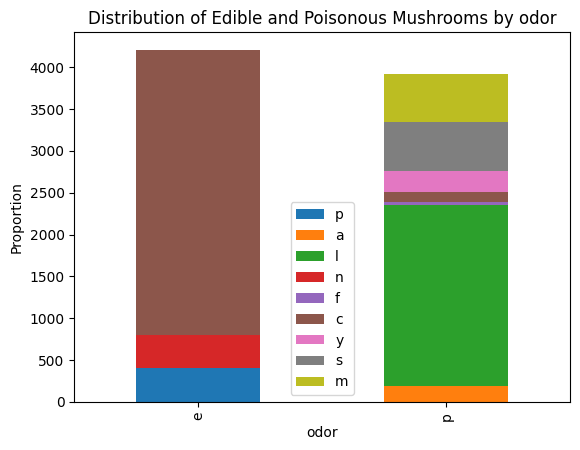

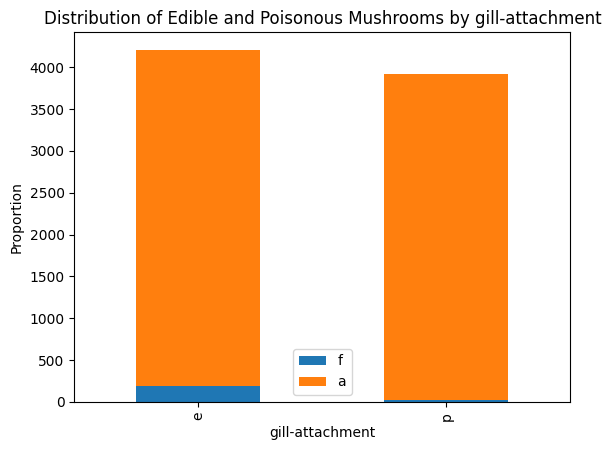

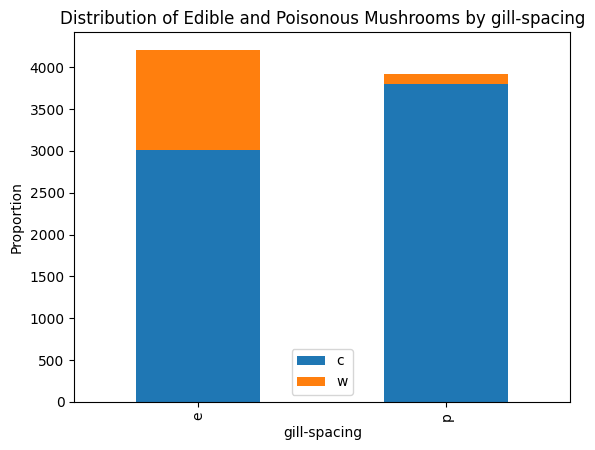

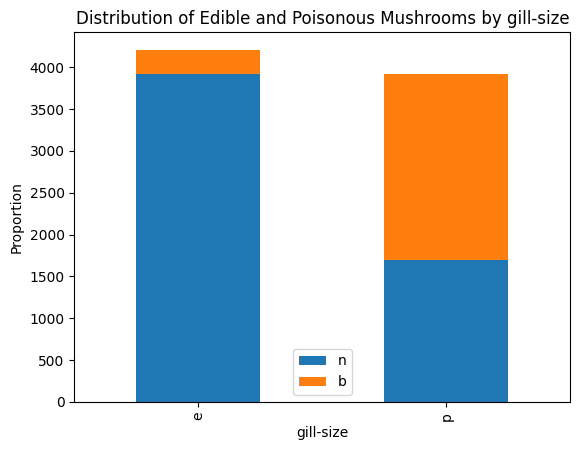

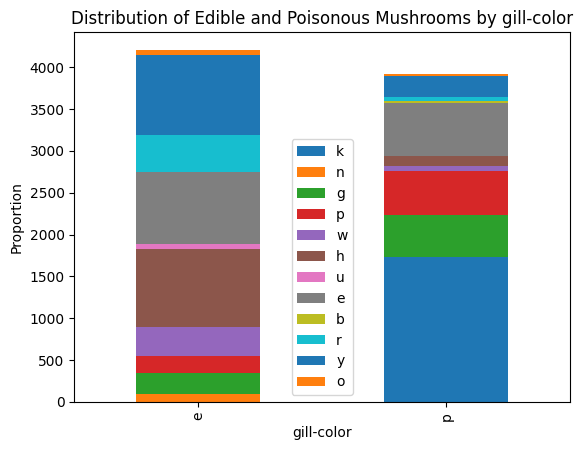

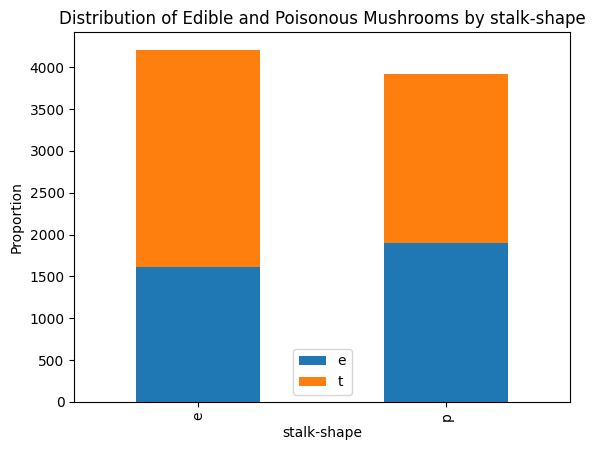

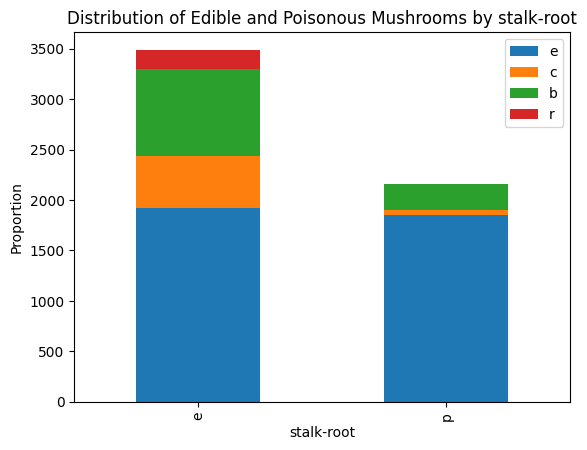

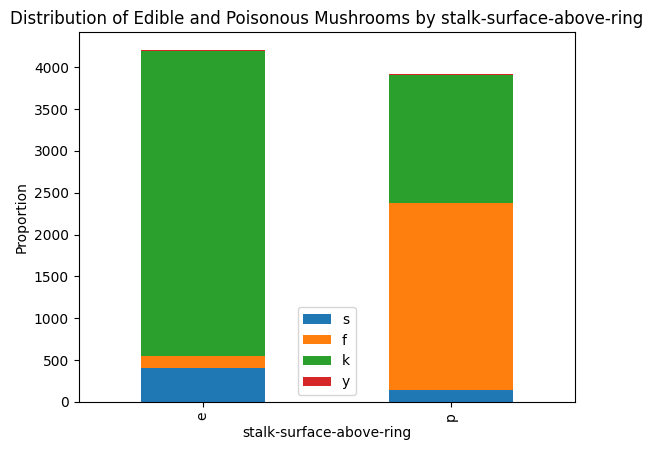

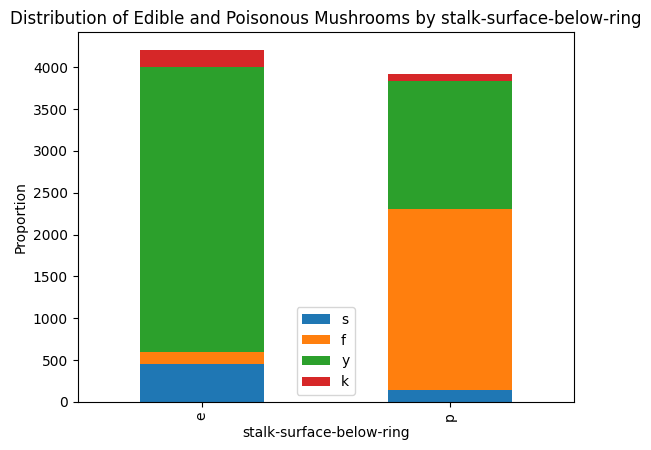

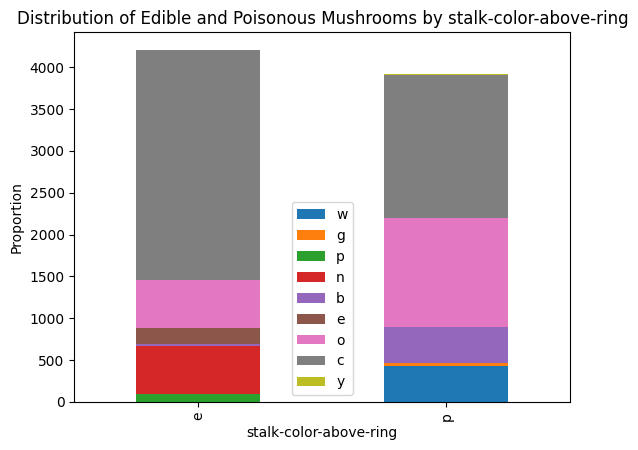

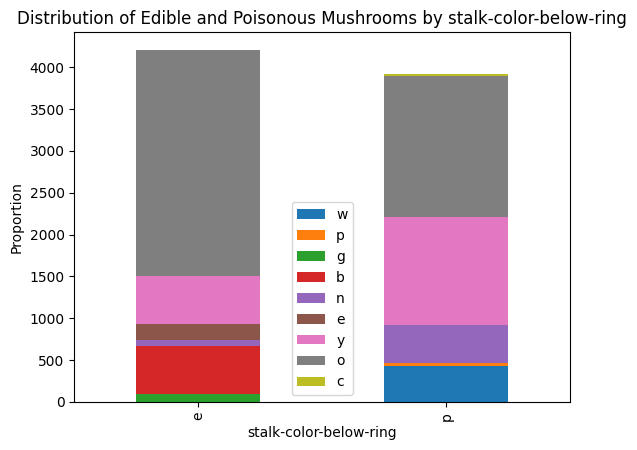

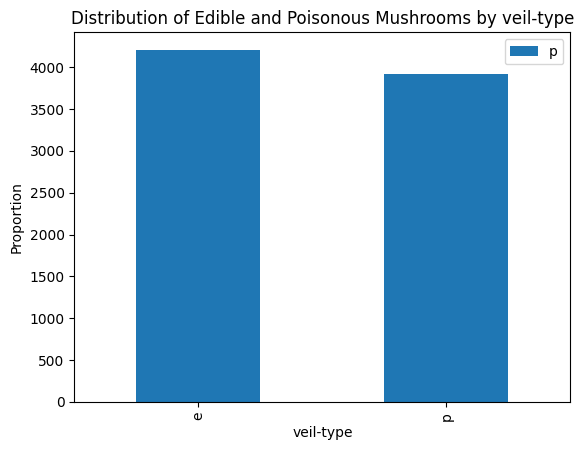

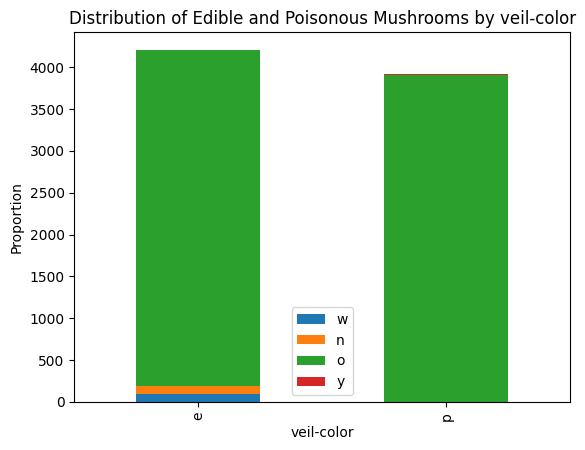

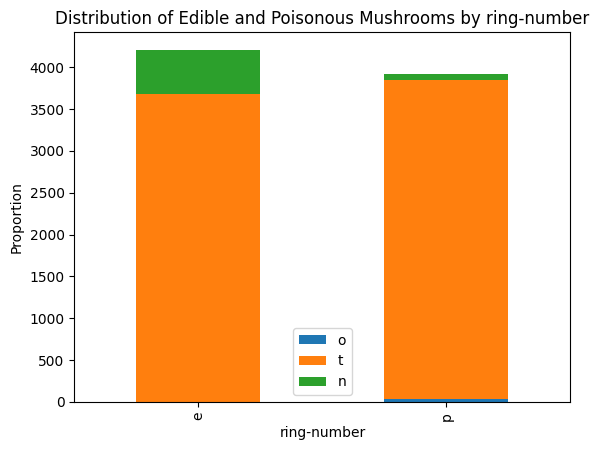

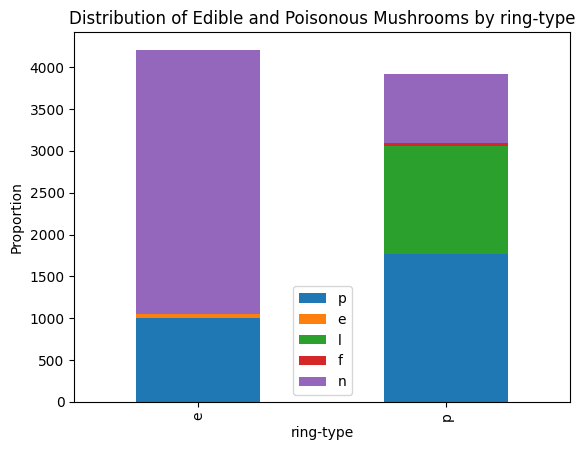

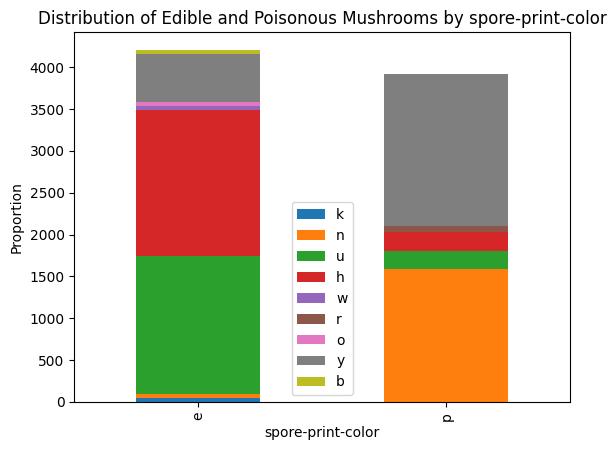

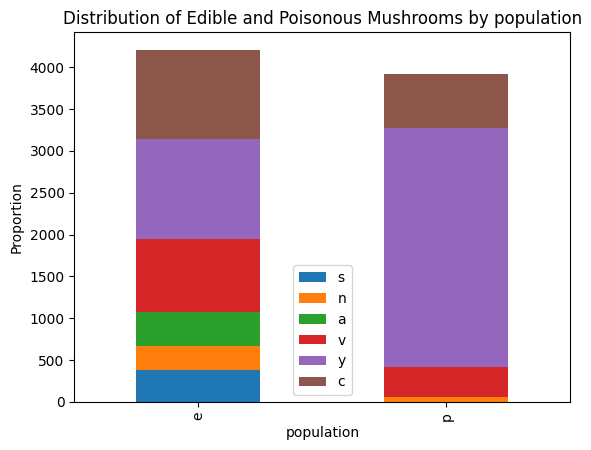

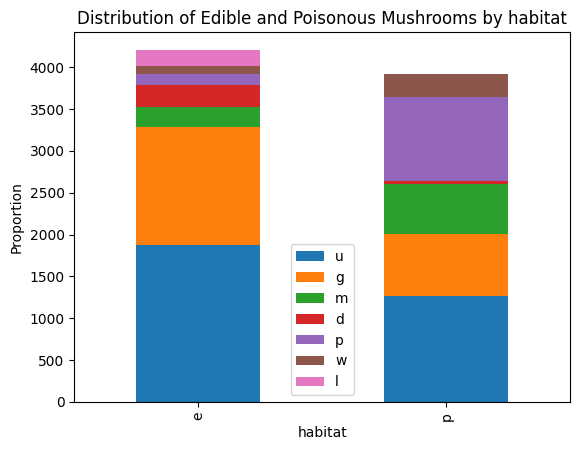

In [8]:
# Now I will see if there is any determining factors for any of the features in terms of edibility
grouped = mushrooms.groupby(['poisonous'])

# Iterate over each feature and plot the bar graph
for feature in mushrooms.columns:
    if feature != 'poisonous':  # Skip the target variable
        feature_counts = grouped[feature].value_counts().unstack()
        feature_counts.plot(kind='bar', stacked=True)
        plt.title(f"Distribution of Edible and Poisonous Mushrooms by {feature}")
        plt.xlabel(feature)
        plt.ylabel("Proportion")
        plt.legend(mushrooms[feature].unique())
        plt.show()

In [9]:
# testing for minimal or null amounts of each category in each target
#for feature in mushrooms.columns:
    #if feature != 'poisonous':  # Skip the target variable
        #print(f"Feature: {feature}")
        #feature_counts = grouped[feature].value_counts().unstack(fill_value=0)
        #print(feature_counts)
        #print()

The provided data on the distribution of edible and poisonous mushrooms across various features serves as a valuable resource for feature engineering and pipeline development. By examining the characteristics of mushrooms categorized by their edibility, we can identify informative features that strongly correlate with the target variable (edibility).

- __Feature Engineering__:  Feature engineering can involve transforming or combining existing features, such as encoding categorical variables or creating new features based on domain knowledge. Additionally, understanding the distribution of mushrooms across different features can inform the selection of appropriate preprocessing techniques and model architectures in the pipeline.For instance, features with significant discriminatory power between edible and poisonous mushrooms can be prioritized, while features with minimal impact can be excluded or transformed to improve model performance. Integrating this insight into the pipeline design ensures that the model can effectively distinguish between edible and poisonous mushrooms based on their characteristics, ultimately enhancing its predictive capability and generalization to unseen data.

[comment]: <> (I will check if there are small categories that can be defined to just poisonous or just edible.)

#### 2. Variation in Edibility Across Habitats:
- Which habitats tend to have a higher proportion of edible mushrooms?
- Exploring how the distribution of edible and poisonous mushrooms varies across different habitats can reveal potential patterns. Are certain habitats more likely to host edible mushrooms, and vice versa? This insight can contribute to safety considerations for mushroom foragers.

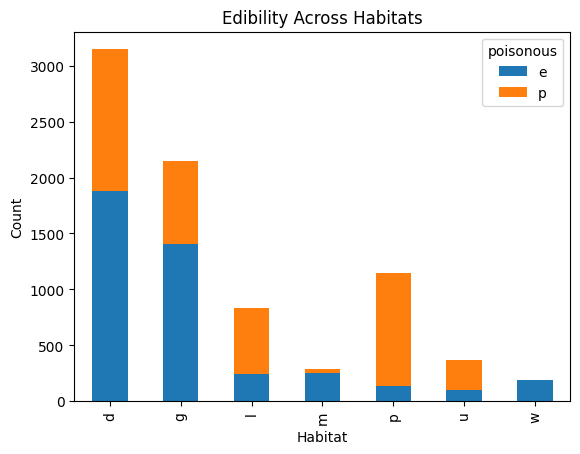

In [ ]:
# 2. Variation in Edibility Across Habitats
# Calculate the distribution of edible and poisonous mushrooms across habitats
#edibility_by_habitat = X['habitat'].value_counts().plot(kind='bar')#df.groupby(['habitat', 'class']).size().unstack().fillna(0)
y['poisonous'].groupby(X['habitat']).value_counts().unstack().plot(kind='bar', stacked=True)
#print(edibility_by_habitat)
# Plot the stacked bar chart
#edibility_by_habitat.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitats')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.show()

Waste habitats consistently have edible mushrooms, while other habitats like leaves, paths, and urban areas show a higher proportion of poisonous mushrooms. This indicates potential safety concerns in certain environments.

#### 3. Effect of Odor on Edibility:
- Are there specific odors that are more commonly associated with either edible or poisonous mushrooms?
- Investigating the correlation between the odor of mushrooms and their edibility is essential. Understanding whether certain odors are associated with either edible or poisonous mushrooms provides practical information for identification in the wild.


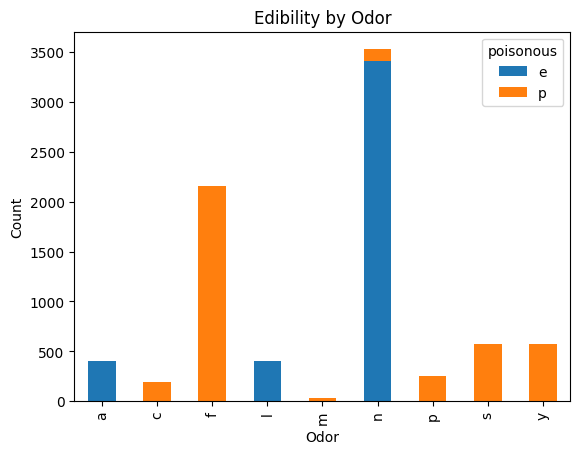

In [ ]:
# 3. Effect of Odor on Edibility
# Calculate the distribution of edible and poisonous mushrooms across odors
y['poisonous'].groupby(X['odor']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Edibility by Odor')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()

odor: a=almond l=anise c=creosote y=fishy f=foul m=musty n=none p=pungent s=spicy

Mushrooms with almond or anise scents are consistently edible, while those with foul, creosote, fishy, spicy, pungent, and musty odors are predominantly poisonous. This information is crucial for identifying mushrooms based on their smell.

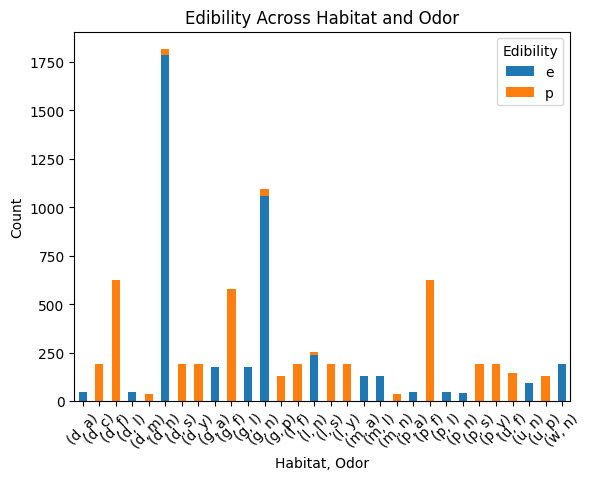

In [ ]:
# Combine 'habitat' and 'odor' into a single DataFrame
data = pd.concat([X['habitat'], X['odor'], y['poisonous']], axis=1)

# Group by 'habitat' and 'odor', then count occurrences of edibility
edibility_by_habitat_odor = data.groupby(['habitat', 'odor', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_odor.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Odor')
plt.xlabel('Habitat, Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_habitat_odor)

poisonous        e    p
habitat odor           
d       a       48    0
        c        0  192
        f        0  624
        l       48    0
        m        0   36
        n     1784   32
        s        0  192
        y        0  192
g       a      176    0
        f        0  576
        l      176    0
        n     1056   36
        p        0  128
l       f        0  192
        n      240   16
        s        0  192
        y        0  192
m       a      128    0
        l      128    0
        n        0   36
p       a       48    0
        f        0  624
        l       48    0
        n       40    0
        s        0  192
        y        0  192
u       f        0  144
        n       96    0
        p        0  128
w       n      192    0


Habitat and Odor Distribution:
- Habitat and Odor Associations: The table shows how the presence of certain odors varies across different habitats. For example:

- In habitat "d" (Woods), mushrooms with odor "n" (None) are predominantly edible, while mushrooms with odors "c" (Creosote), "s" (Spicy), and "y" (Fishy) are mostly poisonous.
 - Habitat "g" (Grasses) has mushrooms with odor "f" (Foul) predominantly poisonous, while odor "a" (Almond) is associated with mostly edible mushrooms.
 - Habitat "l" (Leaves) primarily contains mushrooms with odor "n" (None), among which some are edible and some are poisonous.

- Absence of Certain Odors: Some habitats have no mushrooms with certain odors. For instance:
 - Habitat "m" (Meadows) lacks mushrooms with odor "a" (Almond), "f" (Foul), and "y" (Fishy).
 - Habitat "u" (Urban) does not have mushrooms with odor "a" (Almond) or "f" (Foul).

- Varied Distribution: The distribution of edible and poisonous mushrooms varies across habitats and odors, indicating potential associations between these factors and mushroom toxicity.

- Predictive Features: Understanding the relationships between habitat, odor, and mushroom toxicity can be valuable for predictive modeling. Features derived from these associations may contribute to the accurate classification of mushrooms as edible or poisonous.

#### 4. Population and Edibility:
- Can we identify any trends or patterns in terms of population and the likelihood of mushrooms being edible?
- Analyzing the relationship between the population of mushrooms in a specific area and their edibility can offer valuable insights. Are certain population levels indicative of a higher likelihood of mushrooms being edible, or is there no discernible pattern?


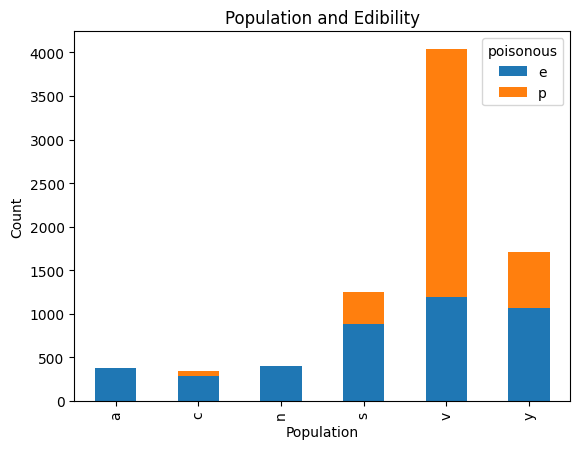

In [ ]:
# 4. Population and Edibility
# Calculate the distribution of edible and poisonous mushrooms across populations
y['poisonous'].groupby(X['population']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Population and Edibility')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

Mushrooms in abundant and numerous populations tend to be edible. However, other population categories show a mixed distribution of edible and poisonous mushrooms. This suggests a potential correlation between population levels and edibility.

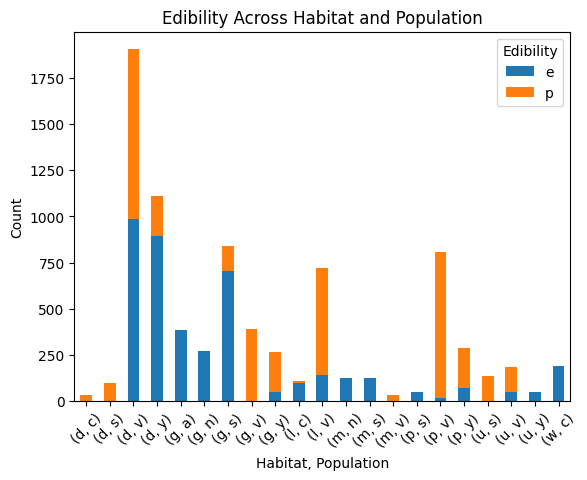

In [ ]:
# Combine 'habitat' and 'population' into a single DataFrame
data = pd.concat([X['habitat'], X['population'], y['poisonous']], axis=1)

# Group by 'habitat' and 'population', then count occurrences of edibility
edibility_by_habitat_pop = data.groupby(['habitat', 'population', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_pop.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Population')
plt.xlabel('Habitat, Population')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_habitat_pop)

poisonous             e    p
habitat population          
d       c             0   36
        s             0   96
        v           984  920
        y           896  216
g       a           384    0
        n           272    0
        s           704  136
        v             0  388
        y            48  216
l       c            96   16
        v           144  576
m       n           128    0
        s           128    0
        v             0   36
p       s            48    0
        v            16  792
        y            72  216
u       s             0  136
        v            48  136
        y            48    0
w       c           192    0


Habitat and Population Distribution:
- The data provides counts of mushrooms categorized by habitat and population. We can see how different habitats (g=grasses l=leaves m=meadows p=paths u=urban w=waste d=woods) have varying populations of mushrooms.

- Edibility Across Habitats and Populations: By examining the counts of edible (e) and poisonous (p) mushrooms within each habitat and population category, we can observe patterns in mushroom edibility across different environments. For example:

 - In habitat "d" (Woods), the majority of mushrooms in populations "v" (Several) and "y" (Solitary) are poisonous, while population "c" (Clustered) has no edible mushrooms.
 - In habitat "g" (Grasses), there are no edible mushrooms in populations "a" (Abundant) and "n" (Numerous).
 - In habitat "u" (Urban), all edible mushrooms are found in populations "v" and "y", while population "s" (Scattered) only has poisonous mushrooms.
 - In habitat "w" (Waste), all mushrooms are in population "c" are edible.

- Potential Predictive Features: The distribution of mushroom edibility across different habitat-population combinations can serve as potential predictive features for building our model. These features can help differentiate between edible and poisonous mushrooms based on their habitat and population characteristics.

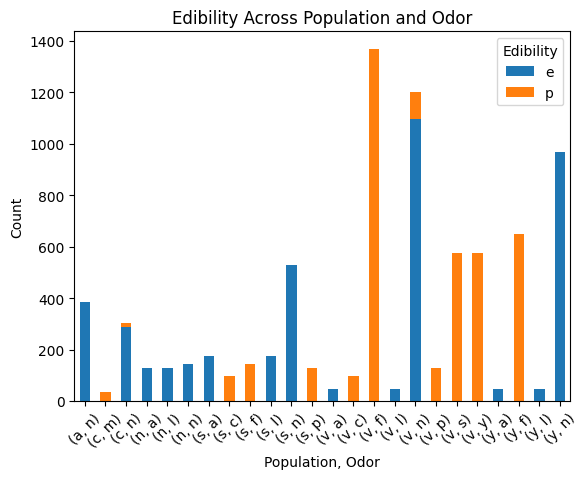

In [ ]:
# Combine 'population' and 'odor' into a single DataFrame
data = pd.concat([X['population'], X['odor'], y['poisonous']], axis=1)

# Group by 'population' and 'odor', then count occurrences of edibility
edibility_by_pop_odor = data.groupby(['population', 'odor', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_pop_odor.plot(kind='bar', stacked=True)
plt.title('Edibility Across Population and Odor')
plt.xlabel('Population, Odor')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

In [ ]:
print(edibility_by_pop_odor)

poisonous           e     p
population odor            
a          n      384     0
c          m        0    36
           n      288    16
n          a      128     0
           l      128     0
           n      144     0
s          a      176     0
           c        0    96
           f        0   144
           l      176     0
           n      528     0
           p        0   128
v          a       48     0
           c        0    96
           f        0  1368
           l       48     0
           n     1096   104
           p        0   128
           s        0   576
           y        0   576
y          a       48     0
           f        0   648
           l       48     0
           n      968     0


Population and Odor
- The data you provided shows the distribution of edible (e) and poisonous (p) mushrooms across different populations and odors. Here are some observations

- Edibility Across Populations and Odors: The table illustrates how mushroom edibility varies depending on both the population and odor categories.

 - Population "a" (Abundant) has only edible mushrooms for odor categories "n" (None), "l" (Anise), and "f" (Foul).
 - Population "c" (Clustered) has both edible and poisonous mushrooms, with odor "n" (None) having the highest count of edible mushrooms.
 - Population "s" (Scattered) has a mix of edible and poisonous mushrooms across various odor categories, with odor "n" (None) having the highest count of both edible and poisonous mushrooms.
 - Population "v" (Several) has a diverse distribution of mushrooms across odor categories, with odor "f" (Foul) having the highest count of poisonous mushrooms.
 - Population "y" (Solitary) mostly consists of edible mushrooms, especially in odor categories "a" (Almond) and "n" (None).

- Potential Predictive Features: The data suggests potential predictive patterns between population, odor, and mushroom edibility. Certain odor categories may be strongly associated with either edible or poisonous mushrooms within specific populations. These associations can serve as valuable features for predicting mushroom edibility in machine learning models.

#### 5. Effect of Cap-color on Edibility

- Can we identify any trends or patterns in terms of cap-color and the likelihood of mushrooms being edible?
- Effect of Cap-Color on Edibility
The color of a mushroom's cap is one of its most prominent and easily observable features. In this section, we'll explore the relationship between cap color and the edibility of mushrooms.

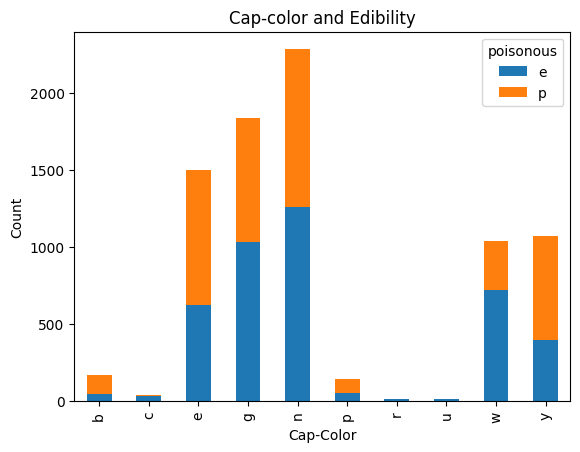

In [187]:
# 5. Cap-color and Edibility
# Calculate the distribution of edible and poisonous mushrooms across cap-colors
y['poisonous'].groupby(X['cap-color']).value_counts().unstack().plot(kind='bar', stacked=True)
# Plot the stacked bar chart
plt.title('Cap-color and Edibility')
plt.xlabel('Cap-Color')
plt.ylabel('Count')
plt.show()

When just looking at cap-color, se see that it is not a good fit for determining edibility alone. Both edible and poisonous mushrooms come in at least eight out of the ten colors within the dataset. However, lets see how it helps to determining edibility when grouped with odor, habitat, and population.

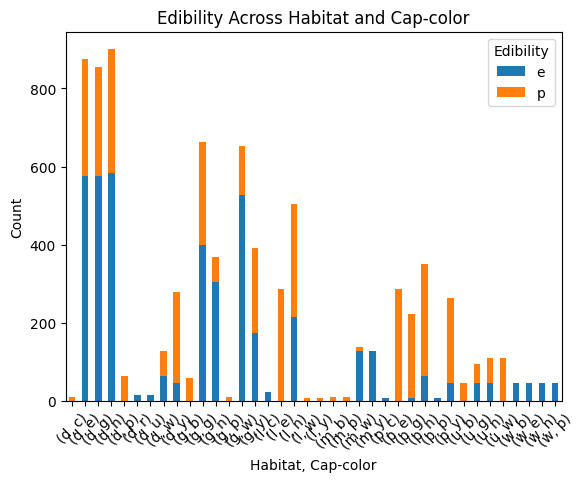

In [190]:
# Combine 'habitat' and 'population' into a single DataFrame
data = pd.concat([X['habitat'], X['cap-color'], y['poisonous']], axis=1)

# Group by 'habitat' and 'population', then count occurrences of edibility
edibility_by_habitat_pop = data.groupby(['habitat', 'cap-color', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_pop.plot(kind='bar', stacked=True)
plt.title('Edibility Across Habitat and Cap-color')
plt.xlabel('Habitat, Cap-color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

When looking at Habitiat and cap-color together, we see that it is not much better than going off cap-color alone. Both edible and poisionous mushrooms come in all colors within habitats. However grouping these together does help us learn about edibility and cap-color, as we now know pink mushrooms in the woods are always poisonous, but pink mushrooms in the waste are always edible.

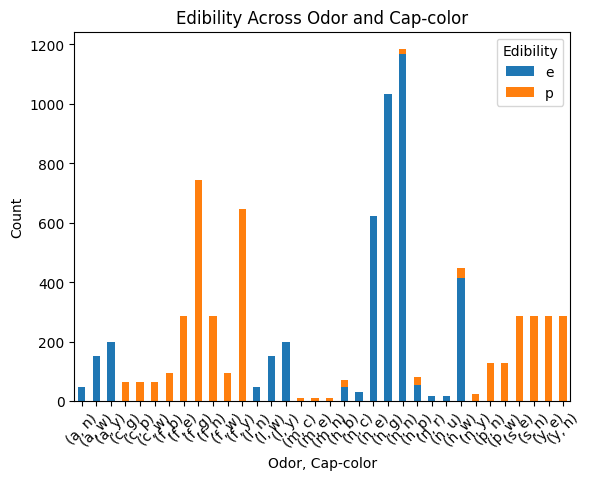

In [189]:
# Combine 'habitat' and 'population' into a single DataFrame
data = pd.concat([X['odor'], X['cap-color'], y['poisonous']], axis=1)

# Group by 'habitat' and 'population', then count occurrences of edibility
edibility_by_habitat_pop = data.groupby(['odor', 'cap-color', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_pop.plot(kind='bar', stacked=True)
plt.title('Edibility Across Odor and Cap-color')
plt.xlabel('Odor, Cap-color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

Comparing odor and cap-color together is a much better fit than habitat and cap-color. Now we see groups that are only poisonous or edible. Definable factors like these can help our model be more accurate at predicting edibility.

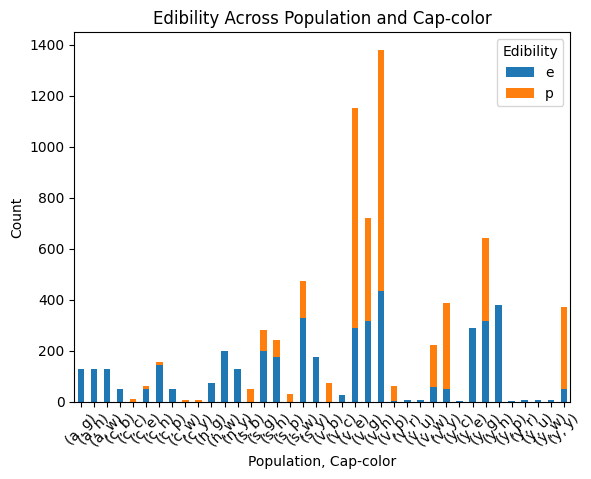

In [191]:
# Combine 'habitat' and 'population' into a single DataFrame
data = pd.concat([X['population'], X['cap-color'], y['poisonous']], axis=1)

# Group by 'habitat' and 'population', then count occurrences of edibility
edibility_by_habitat_pop = data.groupby(['population', 'cap-color', 'poisonous']).size().unstack(fill_value=0)

# Plot the stacked bar chart
edibility_by_habitat_pop.plot(kind='bar', stacked=True)
plt.title('Edibility Across Population and Cap-color')
plt.xlabel('Population, Cap-color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Edibility')  # Add legend with edibility labels
plt.show()

While grouping populaiton and cap-color may not seem like the best because poisonous mushrooms and edible are together in some categories, but actually we do gain some definining categories we didnt have before. Lets see how we can use this knowledge to make feature sets.

## Feature Engineering
In light of the Basic EDA findings, the feature engineering plan includes:

- Encode categorical variables: I will apply one-hot encoding to convert categorical features into numerical format.
- Odor feature transformation: Grouping similar odors and creating binary features for commonly occurring odors that correlate with edibility.
- Simplifying population feature: Combine population categories based on edibility distribution.
- Habitat feature modification: Consider combining or reclassifying habitats to enhance feature relevance.


###Feature engineering 'Features'


1. __Combine Habitat and Odor Features__: We can create new features by combining habitat and odor information. For example, we can create binary variables indicating the presence or absence of specific odor-habitat combinations.
2. __Combine Population and Habitat__: Create new features by combining information about population and habitat. We can encode these combinations as categorical variables or derive numerical representations that capture the joint influence of population and habitat on mushroom toxicity.
3. __Combine Population and Odor__: Similarly, generate new features by combining population and odor attributes. Explore different combinations and encoding schemes to represent the joint effects of population and odor on mushroom toxicity.
4. __Interaction Terms for Population-Habitat and Population-Odor__: Investigate potential interactions between population and habitat, as well as population and odor. These interactions may reveal synergistic or antagonistic relationships that affect mushroom toxicity.
5. __Target Encodingv: Encode categorical variables based on the target variable's mean or frequency within each category. This can provide valuable information about how each category relates to the target variable.
6. __Frequency Encoding__: Encode categorical variables based on their frequency or count within the dataset. This can help capture the importance of each category relative to others.
7. __Handling Rare Categories__: Identify and handle rare categories by either grouping them into a single category or encoding them separately to prevent overfitting.
8. __Validation and Evaluation__: Validate the effectiveness of the new features by evaluating their impact on model performance through cross-validation or holdout validation. Monitor metrics such as accuracy, precision, recall, and F1-score to assess the contribution of the engineered features.


###Feature Set Creation

In this section, we will create feature sets for our models. Feature sets are subsets of features from our dataset that we believe are most relevant for predicting the target variable (mushroom edibility). We will create five feature sets, each containing a combination of attributes selected from the most accurate features identified by The Audubon Society Field Guide to North American Mushrooms, along with additional attributes selected randomly.
#### Explaination:
We have identified six features as being most accurate at classifying mushrooms based on our analysis: Odor, Spore-print-color, Stalk-surface-below-ring, Stalkcolor-above-ring, Habitat, and Cap-color. We aim to include these features in each feature set to ensure that we capture the most important information for predicting mushroom toxicity.

Additionally, we have chosen to include additional attributes randomly selected from the remaining features in our dataset. This approach allows us to explore potential interactions between different features and assess their impact on model performance.
#### Methodology:
1. __Selecting Most Accurate Features__: We started by identifying the six most accurate features based on our analysis: Odor, Spore-print-color, Stalk-surface-below-ring, Stalkcolor-above-ring, Habitat, and Cap-color.

2. __Random Selection of Additional Attributes__: To complement the most accurate features, we randomly selected additional attributes from the remaining features in our dataset. This ensured that each feature set contained a diverse range of attributes that may contribute to predicting mushroom toxicity.

3. __Creating Feature Sets__: Using the selected features, we employed a Python function to create five feature sets. Each feature set contained a combination of the most accurate features and randomly selected additional attributes. This allowed us to explore various feature combinations and evaluate their impact on the model's performance.



In [208]:
def create_feature_sets(features, additional_features, num_sets, dataset):
    """
    Create feature sets with specified most accurate features and randomly selected additional features.

    Parameters:
    - features: List of most accurate features
    - additional_features: List of additional features to choose from
    - num_sets: Number of feature sets to create
    - dataset: DataFrame containing the dataset

    Returns:
    - List of feature sets, each containing a combination of features
    """
    feature_sets = []
    num_additional_features = len(additional_features)

    for _ in range(num_sets):
        # Select most accurate features
        feature_set = list()

        # Randomly select three accurate features
        accurate_selected = np.random.choice(features, size=3, replace=False)

        # Add randomly selected accurate features to feature set
        feature_set.extend(accurate_selected)

        # Randomly select additional features
        num_additional_selected = np.random.randint(3, 5)
        random_indices = np.random.choice(num_additional_features, size=num_additional_selected, replace=False)
        additional_selected = [additional_features[i] for i in random_indices]

        # Add randomly selected additional features to feature set
        feature_set.extend(additional_selected)

        # Add feature set to list of feature sets
        feature_sets.append(feature_set)

    return feature_sets

- __Feature Set-1__: ['odor', 'spore-print-color', 'cap-color', 'population', 'gill-color', 'ring-type']
- __Feature Set-2__: ['cap-color', 'spore-print-color', 'odor', 'ring-type', 'stalk-surface-above-ring', 'bruises']
- __Feature Set-3__: ['habitat', 'stalkcolor-above-ring', 'stalk-surface-below-ring', 'gill-attachment', 'ring-type', 'bruises']
- __Feature Set-4__: ['habitat', 'odor', 'stalkcolor-above-ring', 'veil-color', 'population', 'cap-surface', 'gill-size']
- __Feature Set-5__: ['stalk-surface-below-ring', 'spore-print-color', 'stalkcolor-above-ring', 'population', 'gill-attachment', 'cap-surface', 'stalk-color-below-ring']

### Data cleaning

Within the dataset we see that there is many missing values for stalk-root so we will remove those entries for now. We will as so remove the veil-type feature as all entries are partial so there is no determining factor in edibility with these mushrooms if we know there is no universal entries.

In [7]:
mushrooms_clean = mushrooms.drop(columns=['veil-type'])
cat_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']
mushrooms_clean.shape

(8124, 22)

In [8]:
Feat_Set_1 = ['odor', 'spore-print-color', 'cap-color', 'population', 'gill-color', 'ring-type']
Feat_Set_2 = ['cap-color', 'spore-print-color', 'odor', 'ring-type', 'stalk-surface-above-ring', 'bruises']
Feat_Set_3 = ['habitat', 'stalk-color-above-ring', 'stalk-surface-below-ring', 'gill-attachment', 'ring-type', 'bruises']
Feat_Set_4 = ['habitat', 'odor', 'stalk-color-above-ring', 'veil-color', 'population', 'cap-color']
Feat_Set_5 = ['stalk-surface-below-ring', 'spore-print-color', 'stalk-color-above-ring', 'population', 'cap-surface', 'stalk-color-below-ring']
Feat_list = [Feat_Set_1, Feat_Set_2, Feat_Set_3, Feat_Set_4, Feat_Set_5]

In [9]:
fs_db_1 = mushrooms_clean[Feat_Set_1].copy()
fs_db_2 = mushrooms_clean[Feat_Set_2].copy()
fs_db_3 = mushrooms_clean[Feat_Set_3].copy()
fs_db_4 = mushrooms_clean[Feat_Set_4].copy()
fs_db_5 = mushrooms_clean[Feat_Set_5].copy()

I am spliting the X and y sets to the categorical features and the target category (poisonous)

In [10]:
class_column = 'poisonous'
random_seed = 1234

X_train, X_test, y_train, y_test = train_test_split(mushrooms_clean.drop(columns=class_column), mushrooms_clean[class_column],
                                                    test_size=0.25, random_state=random_seed, stratify=mushrooms_clean[class_column])

In [11]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(fs_db_1, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(fs_db_2, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(fs_db_3, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(fs_db_4, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(fs_db_5, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])

In [12]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
print('X train n dimensions: ', X_train_1.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
print('X test n dimensions: ', X_test_1.shape)
display(X_test.head())

On X train: 
X train dimensions:  (6093, 21)
X train n dimensions:  (5416, 6)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3293,f,f,e,t,n,f,c,b,n,t,...,s,s,g,g,w,o,p,n,v,d
4487,x,y,g,f,f,f,c,b,p,e,...,k,k,p,p,w,o,l,h,v,d
1576,x,s,w,f,n,f,w,b,k,t,...,f,s,w,w,w,o,e,k,s,g
5512,x,s,g,t,f,f,c,b,w,t,...,s,s,w,w,w,o,p,h,s,g
2467,x,y,e,t,n,f,c,b,p,t,...,s,s,p,w,w,o,p,k,v,d



On X test: 
X test dimensions:  (2031, 21)
X test n dimensions:  (2708, 6)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2572,x,y,n,t,n,f,c,b,w,t,...,s,s,w,g,w,o,p,n,y,d
2746,x,f,g,t,n,f,c,b,n,t,...,s,s,p,g,w,o,p,k,v,d
3365,x,f,p,f,c,f,w,n,g,e,...,s,s,w,w,w,o,p,n,s,d
8013,b,s,n,f,n,a,c,b,n,e,...,s,s,o,o,o,o,p,b,v,l
4483,f,y,g,f,f,f,c,b,h,e,...,k,k,b,p,w,o,l,h,v,g


In [13]:
# y Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
y_train = y_train.to_frame(name='poisonous')
display(y_train.head())

# y test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
y_test = y_test.to_frame(name='poisonous')
display(y_test.head())

On y train: 
y train dimensions:  (6093,)


,poisonous
3293,e
4487,p
1576,e
5512,p
2467,e



On y test: 
y test dimensions:  (2031,)


,poisonous
2572,e
2746,e
3365,p
8013,e
4483,p


Lets one hot encode all of our features to be able to do work on our data consisting of only nominal categorical data

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [15]:
ohetransform = ohe.fit_transform(mushrooms_clean)

In [16]:
ohetransform_1 = ohe.fit_transform(fs_db_1)
ohetransform_2 = ohe.fit_transform(fs_db_2)
ohetransform_3 = ohe.fit_transform(fs_db_3)
ohetransform_4 = ohe.fit_transform(fs_db_4)
ohetransform_5 = ohe.fit_transform(fs_db_5)

## Model Testing

### Model storing
I will test multiple models and I want to try them with different parameters to understand what hypertuning I need to do.**bold text**

In [17]:
# To store models created
best_models = {}

def print_best_parameters(hyperparameters, best_parameters):
    value = "Best parameters: "
    for key in hyperparameters:
        value += str(key) + ": " + str(best_parameters[key]) + ", "
    if hyperparameters:
        print(value[:-2])

def get_best_model(estimator, hyperparameters, xtrain, ytrain, fit_params={}):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring="accuracy")
    best_model = grid_search.fit(xtrain, ytrain, **fit_params)
    best_parameters = best_model.best_estimator_.get_params()
    print_best_parameters(hyperparameters, best_parameters)
    return best_model

def evaluate_model(model, name, xtrain, ytrain):
    print("Accuracy score:", accuracy_score(ytrain, model.predict(xtrain)))
    best_models[name] = model


###Establish an Initial Pipeline
The initial pipeline will involve:

- Imputation: Handling any missing values using an imputer.
- Column Transformation: Utilizing a column transformer to apply different preprocessing steps to different subsets of features.


In [18]:
cat_pipeline = Pipeline(steps=[('onehot_cat', ohe)])

In [19]:
preproc = ColumnTransformer([('cat', cat_pipeline, cat_features)], remainder='passthrough')

preproc_1 = ColumnTransformer([('cat', cat_pipeline, Feat_Set_1)])

preproc_2 = ColumnTransformer([('cat', cat_pipeline, Feat_Set_2)])

preproc_3 = ColumnTransformer([('cat', cat_pipeline, Feat_Set_3)])

preproc_4 = ColumnTransformer([('cat', cat_pipeline, Feat_Set_4)])

preproc_5 = ColumnTransformer([('cat', cat_pipeline, Feat_Set_5)])

### Testing Linear Regession

Establish our training pipeline for our model. We will also impute this missing stalk-root values that are missing from the data set, and encode categorical values.

#### Establish Training Pipeline

In [32]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [311]:
pipe_1 = Pipeline(steps=[('preproc', preproc_1),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

pipe_2 = Pipeline(steps=[('preproc', preproc_2),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

pipe_3 = Pipeline(steps=[('preproc', preproc_3),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

pipe_4 = Pipeline(steps=[('preproc', preproc_4),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

pipe_5 = Pipeline(steps=[('preproc', preproc_5),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])


#### Cross-validation with hyperparameter tuning

In [307]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

# y = f1(x): f1 = 1.2x1 + 2.5x2 + 3.1x3 + 10
# y = f2(x): f2 = -1.2x1 + 0.5x2 + 3.1x3 + 10
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)

In [308]:
tuning_grid

{'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06])}

In [309]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'cap-color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root'...
                                                                          'stalk-color-above-ring',
                                                                          'stalk-color-below-ring',
                                                                          'veil-color',
                                                                          'ring-number',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'population',
                                                                          'habitat'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [258]:
print(grid_search.best_score_)
grid_search.best_params_

1.0


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

This score shows that when we use the full dataset with all its features it is too many to make an accurate model. Lets try to do this pipeline with out feature sets

In [343]:
grid_search_1 = GridSearchCV(pipe_1, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_2 = GridSearchCV(pipe_2, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_3 = GridSearchCV(pipe_3, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_4 = GridSearchCV(pipe_4, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_5 = GridSearchCV(pipe_5, param_grid = tuning_grid, cv = 5, return_train_score=True)

fs_gs = [grid_search_1, grid_search_2, grid_search_3, grid_search_4, grid_search_5]

In [344]:
grid_search_1.fit(X_train_1, y_train_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['odor',
                                                                          'spore-print-color',
                                                                          'cap-color',
                                                                          'population',
                                                                          'gill-color',
                                                                          'ring-type'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [345]:
grid_search_2.fit(X_train_2, y_train_2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['cap-color',
                                                                          'spore-print-color',
                                                                          'odor',
                                                                          'ring-type',
                                                                          'stalk-surface-above-ring',
                                                                          'bruises'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [346]:
grid_search_3.fit(X_train_3, y_train_3)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['habitat',
                                                                          'stalk-color-above-ring',
                                                                          'stalk-surface-below-ring',
                                                                          'gill-attachment',
                                                                          'ring-type',
                                                                          'bruises'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [347]:
grid_search_4.fit(X_train_4, y_train_4)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['habitat',
                                                                          'odor',
                                                                          'stalk-color-above-ring',
                                                                          'veil-color',
                                                                          'population',
                                                                          'cap-color'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [348]:
grid_search_5.fit(X_train_5, y_train_5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['stalk-surface-below-ring',
                                                                          'spore-print-color',
                                                                          'stalk-color-above-ring',
                                                                          'population',
                                                                          'cap-surface',
                                                                          'stalk-color-below-ring'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [353]:
count = 1
for item in fs_gs:
  print("Feature Set "+ str(count) +" best score:")
  print(item.best_score_)
  print(item.best_params_)
  count += 1

Feature Set 1 best score:
0.9985233037925948
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 2 best score:
0.997969287172096
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 3 best score:
0.9163584821443782
{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}
Feature Set 4 best score:
0.9985233037925948
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 5 best score:
0.9329764253321203
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.5}


In [320]:
pd.DataFrame(grid_search_1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088287,0.017228,0.014195,0.003389,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.992620,0.992613,0.991690,...,0.991876,0.001589,13,0.991690,0.990076,0.992615,0.992615,0.991461,0.991691,0.000935
1,0.094501,0.011086,0.011717,0.001188,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.991697,0.987996,0.986150,...,0.989106,0.002218,14,0.990766,0.989153,0.990538,0.990076,0.990307,0.990168,0.000557
2,0.083572,0.002916,0.012312,0.000569,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.991697,0.987996,0.986150,...,0.988552,0.002309,15,0.990766,0.989153,0.989615,0.988691,0.988461,0.989337,0.000817
3,0.087333,0.003897,0.012015,0.000435,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.995387,0.987073,0.992613,...,0.992983,0.003231,12,0.994691,0.988461,0.995384,0.995153,0.994461,0.993630,0.002605
4,0.115697,0.003002,0.010008,0.000420,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.995387,0.996307,0.992613,...,0.994830,0.001501,11,0.994691,0.994461,0.995384,0.995153,0.994461,0.994830,0.000375
5,0.147976,0.007886,0.010322,0.000491,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.996310,0.999077,1.000000,...,0.998523,0.001251,1,0.999077,0.998384,0.998154,0.998384,0.998615,0.998523,0.000313
6,0.177767,0.005189,0.009710,0.000176,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.996310,0.999077,1.000000,...,0.998523,0.001251,1,0.999077,0.998384,0.998154,0.998384,0.998615,0.998523,0.000313
7,0.176867,0.007075,0.009929,0.000580,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.996310,0.999077,1.000000,...,0.998523,0.001251,1,0.999077,0.998384,0.998154,0.998384,0.998615,0.998523,0.000313
8,0.171489,0.008519,0.009999,0.000155,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.996310,0.999077,1.000000,...,0.998523,0.001251,1,0.999077,0.998384,0.998154,0.998384,0.998615,0.998523,0.000313
9,0.176881,0.009110,0.010072,0.000694,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.996310,0.999077,1.000000,...,0.998523,0.001251,1,0.999077,0.998384,0.998154,0.998384,0.998615,0.998523,0.000313


#### Final Fit

In [411]:
best_estimators = [
    grid_search_1.best_estimator_,
    grid_search_2.best_estimator_,
    grid_search_3.best_estimator_,
    grid_search_4.best_estimator_,
    grid_search_5.best_estimator_]

#### Variable Importance
Access the importance in the linear regression model and find insight in our sets.

In [331]:
grid_search_1.classes_

array(['e', 'p'], dtype=object)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_r,10.249177,10.249177,1.0
odor_c,10.127115,10.127115,1.0
odor_l,-9.771592,9.771592,-1.0
odor_a,-9.493489,9.493489,-1.0
odor_n,-9.463564,9.463564,-1.0
odor_p,9.031638,9.031638,1.0
odor_f,6.044493,6.044493,1.0
cap-color_y,4.870365,4.870365,1.0
spore-print-color_u,-4.409095,4.409095,-1.0


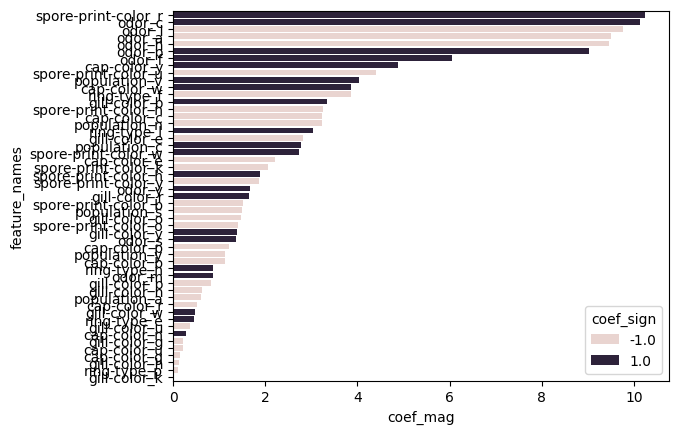

In [389]:
  vip_1 = grid_search_1.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_1.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_1})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_r,11.962974,11.962974,1.0
odor_c,9.155105,9.155105,1.0
odor_n,-9.131875,9.131875,-1.0
odor_l,-8.467101,8.467101,-1.0
odor_a,-8.386241,8.386241,-1.0
odor_p,7.549024,7.549024,1.0
odor_f,5.305498,5.305498,1.0
cap-color_y,3.965189,3.965189,1.0
spore-print-color_n,-3.890191,3.890191,-1.0


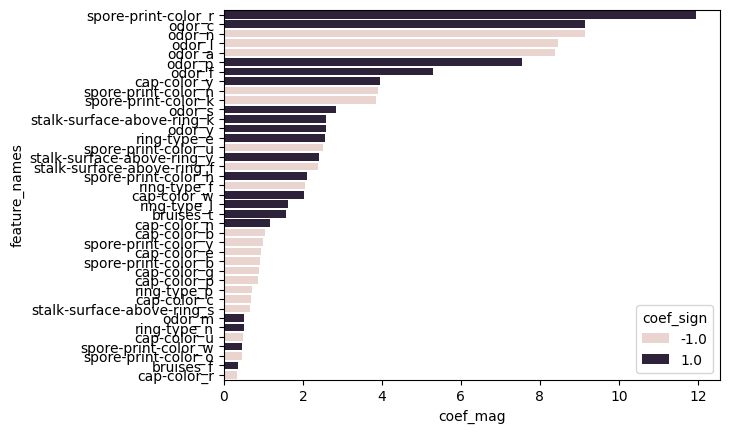

In [392]:
  vip_2 = grid_search_2.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_2.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_2})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
ring-type_l,2.364001,2.364001,1.0
habitat_u,2.101320,2.101320,1.0
habitat_w,-1.916982,1.916982,-1.0
stalk-color-above-ring_g,-1.714764,1.714764,-1.0
stalk-surface-below-ring_k,1.626031,1.626031,1.0
ring-type_p,-1.436954,1.436954,-1.0
stalk-color-above-ring_o,-1.425386,1.425386,-1.0
habitat_g,-1.142162,1.142162,-1.0
habitat_p,1.024949,1.024949,1.0


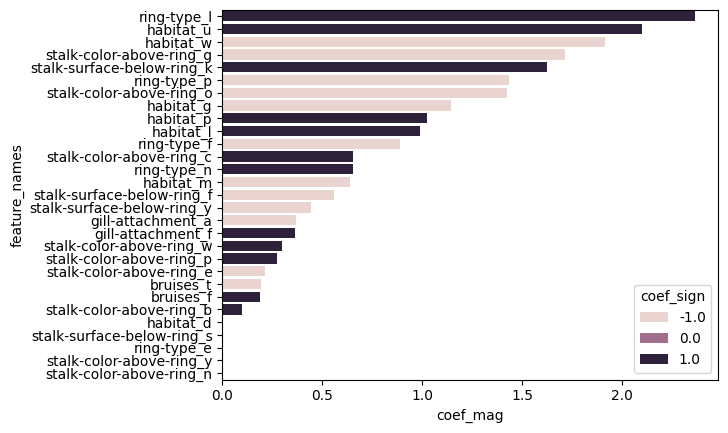

In [395]:
vip_3 = grid_search_3.best_estimator_['mdl'].coef_[0]

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_3.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_3})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
odor_l,-14.545103,14.545103,-1.0
odor_a,-14.402359,14.402359,-1.0
odor_f,10.088396,10.088396,1.0
odor_n,-8.891752,8.891752,-1.0
odor_c,7.769114,7.769114,1.0
population_c,7.452487,7.452487,1.0
habitat_w,-7.104419,7.104419,-1.0
odor_p,6.768569,6.768569,1.0
odor_s,5.889672,5.889672,1.0


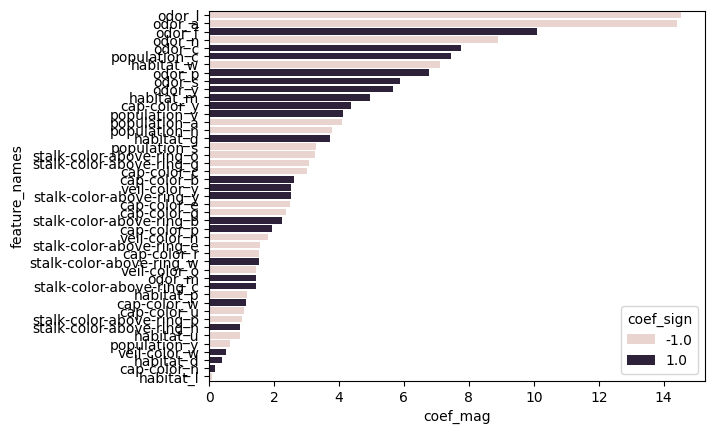

In [399]:
vip_4 = grid_search_4.best_estimator_['mdl'].coef_[0]
# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_4.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_4})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_h,11.655325,11.655325,1.0
stalk-surface-below-ring_f,-9.691712,9.691712,-1.0
spore-print-color_u,-7.865731,7.865731,-1.0
stalk-color-above-ring_g,-6.454626,6.454626,-1.0
stalk-color-below-ring_g,-5.767005,5.767005,-1.0
stalk-color-below-ring_c,5.102172,5.102172,1.0
stalk-color-above-ring_c,5.102172,5.102172,1.0
population_n,-4.958596,4.958596,-1.0
population_v,4.869415,4.869415,1.0


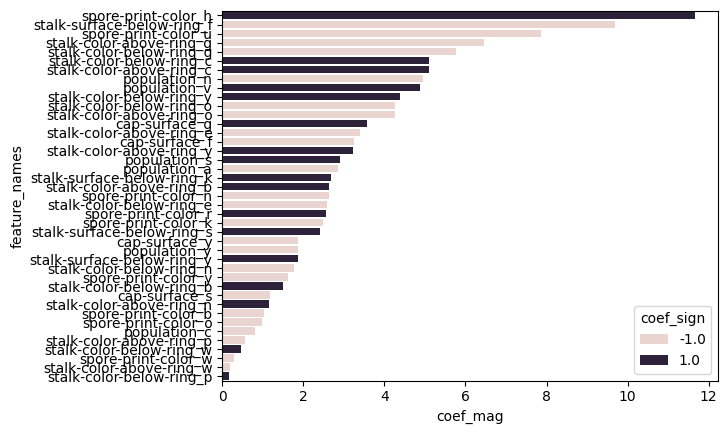

In [402]:
  vip_5 = grid_search_5.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_5.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_5})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

#### Performance metrics on the dataset
Here I will see the performance of a linear regression model. We can see it is not the best fit for our mushroom dataset, perhaps a different model would have more insight.

In [86]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



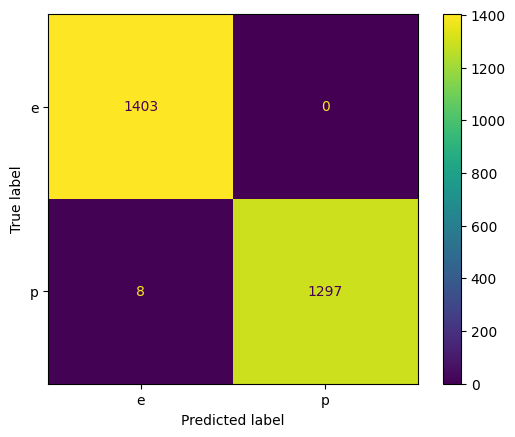

In [405]:
print(classification_report(y_test_1, grid_search_1.best_estimator_.predict(X_test_1)))
cm = confusion_matrix(y_test_1, grid_search_1.best_estimator_.predict(X_test_1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1403
           p       1.00      1.00      1.00      1305

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708



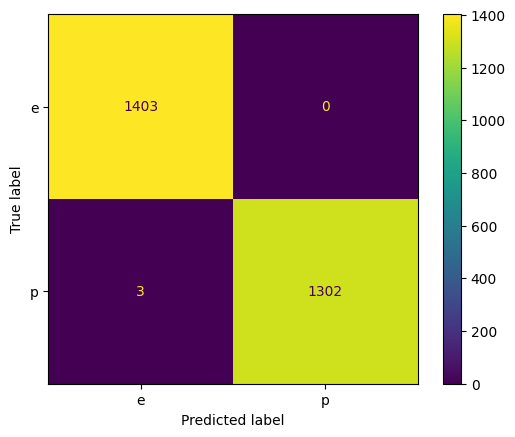

In [406]:
print(classification_report(y_test_2, grid_search_2.best_estimator_.predict(X_test_2)))
cm = confusion_matrix(y_test_2, grid_search_2.best_estimator_.predict(X_test_2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.88      0.96      0.92      1403
           p       0.96      0.86      0.91      1305

    accuracy                           0.91      2708
   macro avg       0.92      0.91      0.91      2708
weighted avg       0.92      0.91      0.91      2708



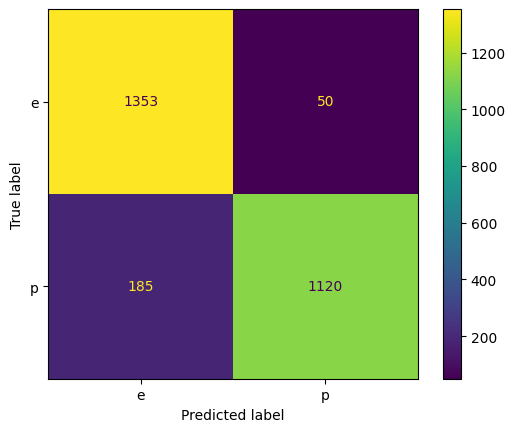

In [407]:
print(classification_report(y_test_3, grid_search_3.best_estimator_.predict(X_test_3)))
cm = confusion_matrix(y_test_3, grid_search_3.best_estimator_.predict(X_test_3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1403
           p       1.00      0.99      1.00      1305

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708



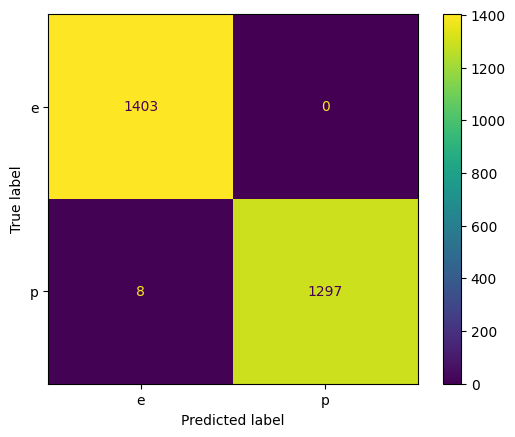

In [408]:
print(classification_report(y_test_4, grid_search_4.best_estimator_.predict(X_test_4)))
cm = confusion_matrix(y_test_4, grid_search_4.best_estimator_.predict(X_test_4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.93      0.94      0.94      1403
           p       0.94      0.92      0.93      1305

    accuracy                           0.93      2708
   macro avg       0.93      0.93      0.93      2708
weighted avg       0.93      0.93      0.93      2708



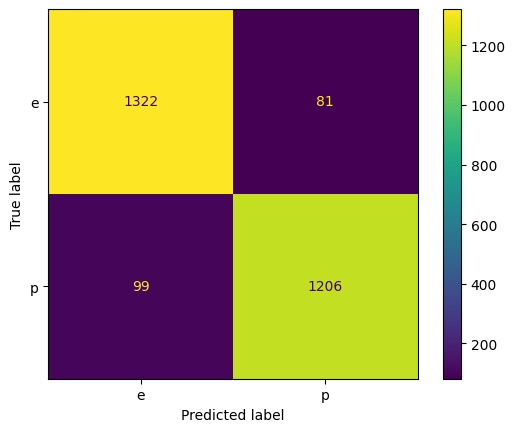

In [409]:
print(classification_report(y_test_5, grid_search_5.best_estimator_.predict(X_test_5)))
cm = confusion_matrix(y_test_5, grid_search_5.best_estimator_.predict(X_test_5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

These classification reports provide insights into the performance of different models in predicting the edibility of mushrooms. The first two reports demonstrate exceptional performance, with precision, recall, and F1-score of 1.00 for both edible (e) and poisonous (p) mushrooms, resulting in perfect accuracy. These models achieved optimal balance between identifying both classes accurately, making them highly reliable for classification tasks. The third report shows slightly lower but still respectable performance, with precision, recall, and F1-score above 0.90 for both classes, indicating strong predictive capability. The last report, while still showing decent performance, exhibits a slightly lower F1-score, suggesting some imbalance in the model's ability to correctly identify both classes. Overall, the first two models stand out for their exceptional performance, while the others also demonstrate competent classification capabilities.



Next, I plan to implement a voting classification approach using a VotingClassifier. This approach is crucial because it allows us to combine the predictions of multiple individual classifiers and aggregate them into a single final prediction. By leveraging the diverse predictions from different models, we aim to enhance the overall performance and robustness of our classification system. The VotingClassifier aggregates the predictions using either a 'soft' or 'hard' voting strategy. In our case, we'll utilize the 'soft' voting strategy, which considers the weighted average of probabilities predicted by each model. This ensemble technique can often lead to better generalization and more reliable predictions, especially when individual models have varying strengths and weaknesses. After fitting the VotingClassifier on the training data and generating predictions on the test set, we'll evaluate its performance using classification metrics such as precision, recall, and F1-score to assess its effectiveness in predicting mushroom edibility.

In [416]:
voting_classifier = VotingClassifier(estimators=[('gs1', best_estimators[0]),
                                                 ('gs2', best_estimators[1]),
                                                 ('gs3', best_estimators[2]),
                                                 ('gs4', best_estimators[3]),
                                                 ('gs5', best_estimators[4])],
                                     voting='soft')
# Fit the voting classifier on your training data
voting_classifier.fit(X_train, y_train)

# Predict with the voting classifier
y_pred = voting_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031




The result of the VotingClassifier shows excellent performance with an accuracy, precision, recall, and F1-score of 1.00 for both classes (edible and poisonous mushrooms).

This indicates that the ensemble of models, combined through the VotingClassifier, achieved perfect classification on the test set. The precision, recall, and F1-score for both classes are all 1.00, indicating that the classifier correctly classified all instances of both classes, with no false positives or false negatives.

Such high performance suggests that the ensemble method, which aggregates predictions from multiple individual linear regression classifiers, effectively leveraged the strengths of each individual model to achieve superior performance compared to any single model alone. This robustness is particularly valuable in classification tasks where accuracy and reliability are crucial, such as in the identification of edible and poisonous mushrooms.

### Testing Random Forest Model

#### Establish Training Pipeline

In [430]:
#generate the whole modeling pipeline with preprocessing
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', RandomForestClassifier())])

#visualization for steps
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8c5dfc24d0>)])),
                ('mdl', RandomForestClassifier())])

In [432]:
pipe_1 = Pipeline(steps=[('preproc', preproc_1),
                       ('mdl', RandomForestClassifier())])

pipe_2 = Pipeline(steps=[('preproc', preproc_2),
                       ('mdl', RandomForestClassifier())])

pipe_3 = Pipeline(steps=[('preproc', preproc_3),
                       ('mdl', RandomForestClassifier())])

pipe_4 = Pipeline(steps=[('preproc', preproc_4),
                       ('mdl', RandomForestClassifier())])

pipe_5 = Pipeline(steps=[('preproc', preproc_5),
                       ('mdl', RandomForestClassifier())])


#### Cross Validation and hyperparameter tuning

In [431]:
tuning_grid = {'mdl__n_estimators' : [100, 200 ,500],
               'mdl__max_depth': [10, 15, 20] }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)
tuning_grid

{'mdl__n_estimators': [100, 200, 500], 'mdl__max_depth': [10, 15, 20]}

In [ ]:
grid_search_1 = GridSearchCV(pipe_1, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_2 = GridSearchCV(pipe_2, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_3 = GridSearchCV(pipe_3, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_4 = GridSearchCV(pipe_4, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_5 = GridSearchCV(pipe_5, param_grid = tuning_grid, cv = 5, return_train_score=True)

fs_gs = [grid_search_1, grid_search_2, grid_search_3, grid_search_4, grid_search_5]

In [433]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c8c5dfc24d0>)])),
                                       ('mdl', RandomForestClassifier())]),
             param_grid={'mdl__max_depth': [10, 15, 20],
                         'mdl__n_estimators': [100, 200, 500]},
             return_train_score=True)

In [434]:
grid_search_1.fit(X_train_1, y_train_1)
grid_search_2.fit(X_train_2, y_train_2)
grid_search_3.fit(X_train_3, y_train_3)
grid_search_4.fit(X_train_4, y_train_4)
grid_search_5.fit(X_train_5, y_train_5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['stalk-surface-below-ring',
                                                                          'spore-print-color',
                                                                          'stalk-color-above-ring',
                                                                          'population',
                                                                          'cap-surface',
                                                                          'stalk-color-below-ring'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [435]:
print(grid_search.best_score_)
grid_search.best_params_

1.0


{'mdl__max_depth': 10, 'mdl__n_estimators': 100}

In [436]:
count = 1
for item in fs_gs:
  print("Feature Set "+ str(count) +" best score:")
  print(item.best_score_)
  print(item.best_params_)
  count += 1

Feature Set 1 best score:
0.9985233037925948
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 2 best score:
0.997969287172096
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 3 best score:
0.9163584821443782
{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}
Feature Set 4 best score:
0.9985233037925948
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}
Feature Set 5 best score:
0.9327917531252874
{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}


In [437]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__max_depth,param_mdl__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.388052,0.010843,0.031975,0.000950,10,100,"{'mdl__max_depth': 10, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.713532,0.007021,0.047907,0.001025,10,200,"{'mdl__max_depth': 10, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.838702,0.206681,0.108281,0.013373,10,500,"{'mdl__max_depth': 10, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.444421,0.094823,0.040182,0.010430,15,100,"{'mdl__max_depth': 15, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.787066,0.161980,0.048480,0.000803,15,200,"{'mdl__max_depth': 15, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.870075,0.275074,0.100015,0.002019,15,500,"{'mdl__max_depth': 15, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.385229,0.011990,0.032451,0.002924,20,100,"{'mdl__max_depth': 20, 'mdl__n_estimators': 100}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.743651,0.047737,0.055365,0.009043,20,200,"{'mdl__max_depth': 20, 'mdl__n_estimators': 200}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,2.053602,0.231954,0.115702,0.017370,20,500,"{'mdl__max_depth': 20, 'mdl__n_estimators': 500}",1.0,1.0,1.0,...,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


#### Final Fit

In [281]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8c5c9482b0>)])),
                ('mdl', RandomForestClassifier(max_depth=10))])

In [438]:
best_estimators = [
    grid_search_1.best_estimator_,
    grid_search_2.best_estimator_,
    grid_search_3.best_estimator_,
    grid_search_4.best_estimator_,
    grid_search_5.best_estimator_]

#### Variable Importance

In [282]:
grid_search.classes_

array(['e', 'p'], dtype=object)

In [283]:
vip = grid_search.best_estimator_['mdl'].feature_importances_
vip

array([1.83391690e-03, 5.55268516e-05, 9.07761220e-04, 9.40082240e-04,
       7.89150596e-04, 9.21775736e-04, 4.50325868e-03, 1.55404126e-04,
       2.92530360e-03, 3.76525237e-03, 3.23377499e-03, 3.12409014e-04,
       2.61042011e-03, 1.40345643e-03, 8.21396871e-04, 1.14429648e-03,
       1.17592846e-04, 1.92336208e-04, 2.84097112e-03, 1.96605145e-03,
       2.30501348e-02, 4.11099486e-02, 5.69068869e-03, 8.94992092e-03,
       5.95497623e-02, 4.90221354e-03, 3.01998599e-04, 1.23485285e-01,
       1.85768600e-02, 7.11118960e-03, 3.91953888e-03, 1.29128858e-03,
       1.01780748e-03, 1.74126146e-02, 2.03054877e-02, 4.87907274e-02,
       5.30870815e-02, 3.51437270e-02, 2.96598503e-04, 7.95874481e-04,
       7.62519637e-04, 1.23566604e-04, 1.22643305e-03, 6.10524389e-04,
       3.65281907e-04, 1.92462438e-03, 2.60298353e-04, 2.34132036e-03,
       1.77307589e-04, 1.15833071e-02, 1.37701708e-02, 1.14829498e-02,
       4.52196560e-03, 1.64765798e-02, 1.48139757e-03, 7.87450701e-03,
      

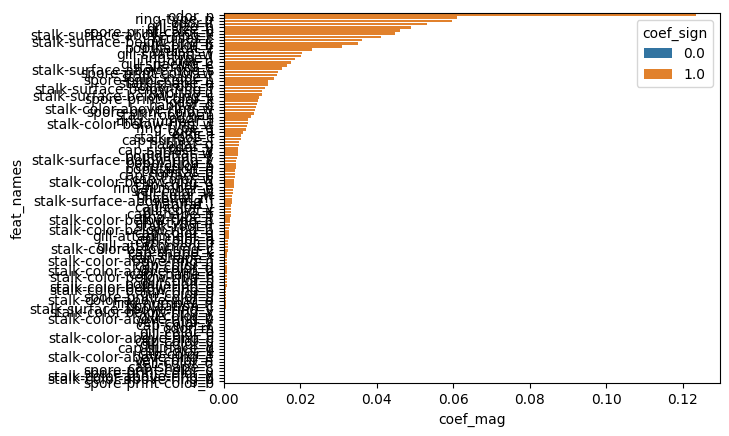

In [285]:
#get names in correct preproc order
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

#create df with vip info
coef_info = pd.DataFrame({'feat_names':np.hstack([cat_names]), 'vip': vip})

#get sign and magnitude information
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

#sort and plot
coef_info = coef_info.set_index('feat_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_r,10.249177,10.249177,1.0
odor_c,10.127115,10.127115,1.0
odor_l,-9.771592,9.771592,-1.0
odor_a,-9.493489,9.493489,-1.0
odor_n,-9.463564,9.463564,-1.0
odor_p,9.031638,9.031638,1.0
odor_f,6.044493,6.044493,1.0
cap-color_y,4.870365,4.870365,1.0
spore-print-color_u,-4.409095,4.409095,-1.0


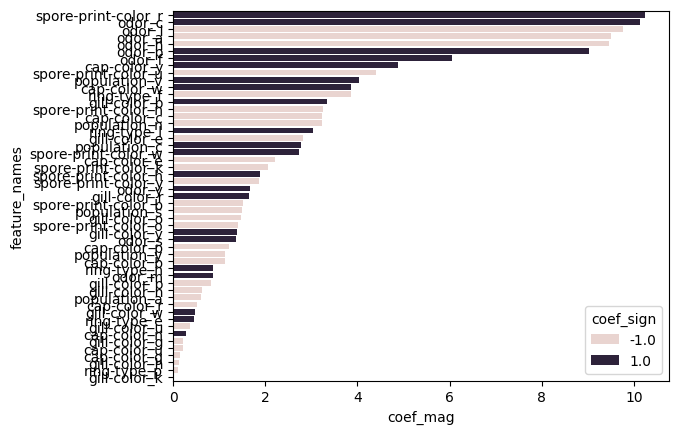

In [ ]:
  vip_1 = grid_search_1.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_1.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_1})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_r,11.962974,11.962974,1.0
odor_c,9.155105,9.155105,1.0
odor_n,-9.131875,9.131875,-1.0
odor_l,-8.467101,8.467101,-1.0
odor_a,-8.386241,8.386241,-1.0
odor_p,7.549024,7.549024,1.0
odor_f,5.305498,5.305498,1.0
cap-color_y,3.965189,3.965189,1.0
spore-print-color_n,-3.890191,3.890191,-1.0


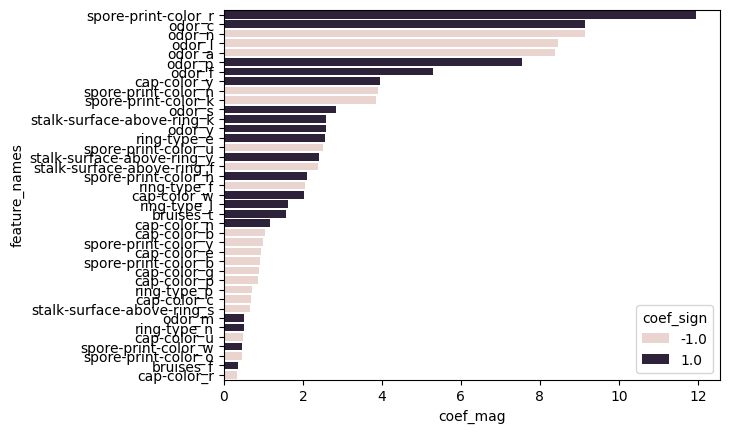

In [ ]:
  vip_2 = grid_search_2.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_2.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_2})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
ring-type_l,2.364001,2.364001,1.0
habitat_u,2.101320,2.101320,1.0
habitat_w,-1.916982,1.916982,-1.0
stalk-color-above-ring_g,-1.714764,1.714764,-1.0
stalk-surface-below-ring_k,1.626031,1.626031,1.0
ring-type_p,-1.436954,1.436954,-1.0
stalk-color-above-ring_o,-1.425386,1.425386,-1.0
habitat_g,-1.142162,1.142162,-1.0
habitat_p,1.024949,1.024949,1.0


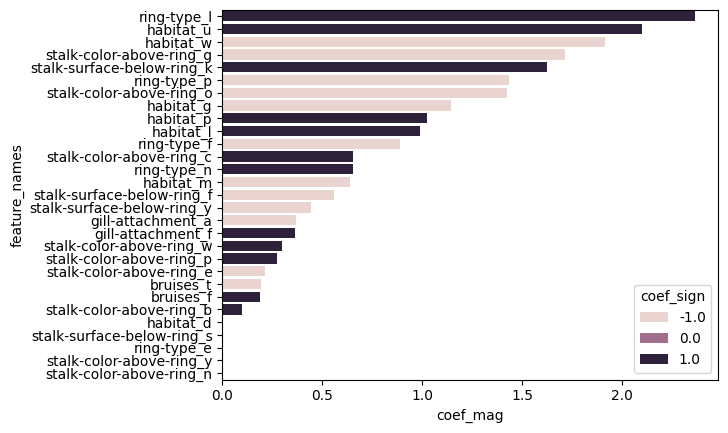

In [ ]:
vip_3 = grid_search_3.best_estimator_['mdl'].coef_[0]

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_3.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_3})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
odor_l,-14.545103,14.545103,-1.0
odor_a,-14.402359,14.402359,-1.0
odor_f,10.088396,10.088396,1.0
odor_n,-8.891752,8.891752,-1.0
odor_c,7.769114,7.769114,1.0
population_c,7.452487,7.452487,1.0
habitat_w,-7.104419,7.104419,-1.0
odor_p,6.768569,6.768569,1.0
odor_s,5.889672,5.889672,1.0


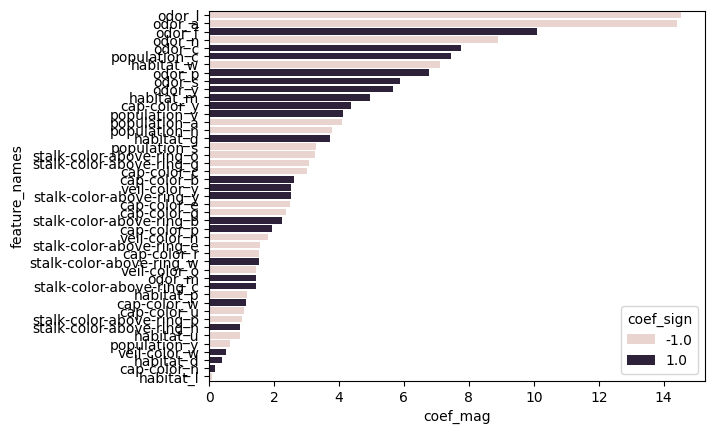

In [ ]:
vip_4 = grid_search_4.best_estimator_['mdl'].coef_[0]
# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_4.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_4})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_h,11.655325,11.655325,1.0
stalk-surface-below-ring_f,-9.691712,9.691712,-1.0
spore-print-color_u,-7.865731,7.865731,-1.0
stalk-color-above-ring_g,-6.454626,6.454626,-1.0
stalk-color-below-ring_g,-5.767005,5.767005,-1.0
stalk-color-below-ring_c,5.102172,5.102172,1.0
stalk-color-above-ring_c,5.102172,5.102172,1.0
population_n,-4.958596,4.958596,-1.0
population_v,4.869415,4.869415,1.0


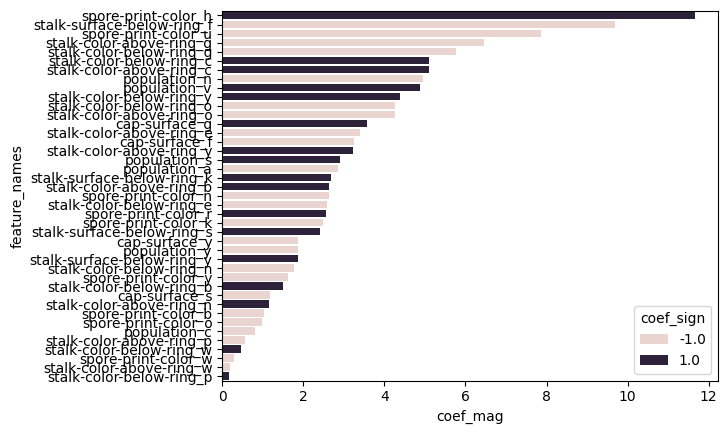

In [ ]:
  vip_5 = grid_search_5.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_5.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_5})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

#### Performance Metrics and Voting Classification

In [439]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1403
           p       1.00      0.99      1.00      1305

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708



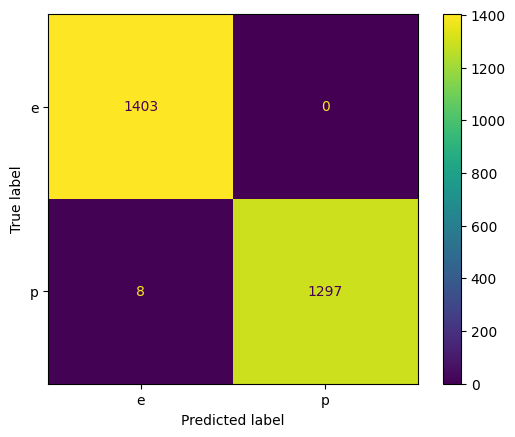

In [440]:
print(classification_report(y_test_1, grid_search_1.best_estimator_.predict(X_test_1)))
cm = confusion_matrix(y_test_1, grid_search_1.best_estimator_.predict(X_test_1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1403
           p       1.00      0.99      1.00      1305

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708



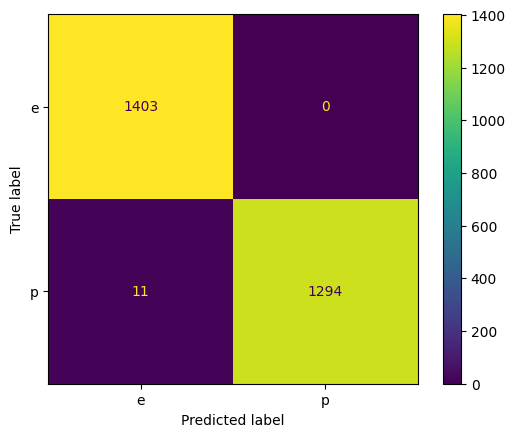

In [441]:
print(classification_report(y_test_2, grid_search_2.best_estimator_.predict(X_test_2)))
cm = confusion_matrix(y_test_2, grid_search_2.best_estimator_.predict(X_test_2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.88      0.96      0.92      1403
           p       0.96      0.86      0.91      1305

    accuracy                           0.91      2708
   macro avg       0.92      0.91      0.91      2708
weighted avg       0.92      0.91      0.91      2708



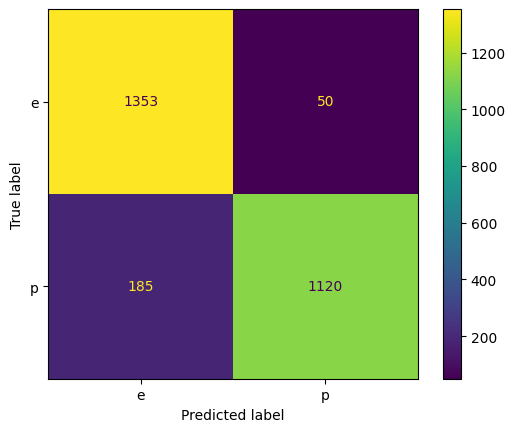

In [442]:
print(classification_report(y_test_3, grid_search_3.best_estimator_.predict(X_test_3)))
cm = confusion_matrix(y_test_3, grid_search_3.best_estimator_.predict(X_test_3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.99      1.00      1.00      1403
           p       1.00      0.99      1.00      1305

    accuracy                           1.00      2708
   macro avg       1.00      1.00      1.00      2708
weighted avg       1.00      1.00      1.00      2708



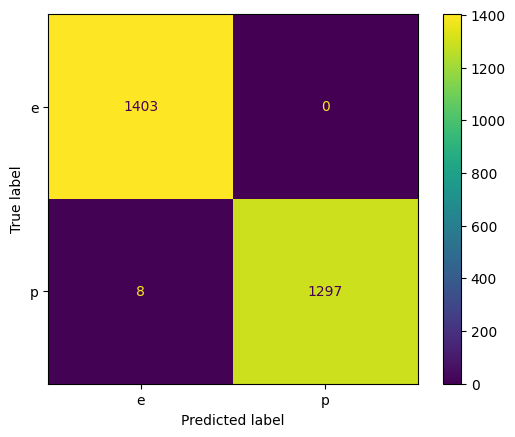

In [443]:
print(classification_report(y_test_4, grid_search_4.best_estimator_.predict(X_test_4)))
cm = confusion_matrix(y_test_4, grid_search_4.best_estimator_.predict(X_test_4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

              precision    recall  f1-score   support

           e       0.93      0.94      0.94      1403
           p       0.94      0.92      0.93      1305

    accuracy                           0.93      2708
   macro avg       0.93      0.93      0.93      2708
weighted avg       0.93      0.93      0.93      2708



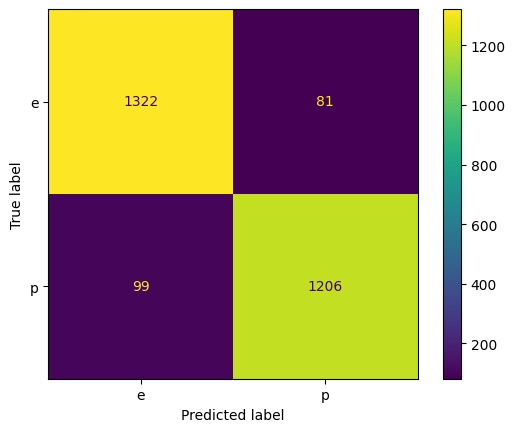

In [444]:
print(classification_report(y_test_5, grid_search_5.best_estimator_.predict(X_test_5)))
cm = confusion_matrix(y_test_5, grid_search_5.best_estimator_.predict(X_test_5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [445]:
voting_classifier = VotingClassifier(estimators=[('gs1', best_estimators[0]),
                                                 ('gs2', best_estimators[1]),
                                                 ('gs3', best_estimators[2]),
                                                 ('gs4', best_estimators[3]),
                                                 ('gs5', best_estimators[4])],
                                     voting='soft')
# Fit the voting classifier on your training data
voting_classifier.fit(X_train, y_train)

# Predict with the voting classifier
y_pred = voting_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



### Testing CategoricalNB model



#### Testing if model should be done

In [29]:
cnb = CategoricalNB()
X_train_oh1, X_test_oh1, y_train_oh1, y_test_oh1 = train_test_split(ohetransform_1, mushrooms[class_column],
                                                            test_size=1/3, random_state=random_seed, stratify=mushrooms[class_column])
k = cnb.fit(X_train_oh1, y_train_oh1)
y_pred_1 = cnb.predict(X_test_oh1)
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           e       0.92      1.00      0.96      1403
           p       1.00      0.91      0.95      1305

    accuracy                           0.95      2708
   macro avg       0.96      0.95      0.95      2708
weighted avg       0.96      0.95      0.95      2708



The precision, recall, and F1-score for the "edible" (e) and "poisonous" (p) classes are high, indicating good performance of the Categorical Naive Bayes model:

- For the "edible" class:

  - Precision: 0.92
  - Recall: 1.00
  - F1-score: 0.96
- For the "poisonous" class:

  - Precision: 1.00
  - Recall: 0.91
  - F1-score: 0.95
  
The overall accuracy of the model is 95%, indicating that it correctly classifies the majority of the samples. The macro and weighted average F1-scores are also high, indicating balanced performance across both classes.

The model demonstrates strong performance in distinguishing between edible and poisonous mushrooms. It is important to consider the specific characteristics of the dataset and the application requirements when selecting the most suitable model.






In [78]:
print(cnb.get_params().keys())

dict_keys(['alpha', 'class_prior', 'fit_prior', 'force_alpha', 'min_categories'])


In [27]:
hyperparameters = {
    'alpha'       : [0.5, 1.0, 1.5, 2.0, 5],
    'force_alpha' : [True, False],
    'fit_prior'   : [True, False],
    'class_prior' : [None, [0.5, 0.5]],
    'min_categories'  : [None, 1, 2, 3, 4, 5]
}
estimator = CategoricalNB()
best_model_categorical_nb = get_best_model(estimator, hyperparameters, X_train_oh1, y_train_oh1)

NameError: name 'X_train_oh1' is not defined

In [ ]:
evaluate_model(best_model_categorical_nb.best_estimator_, 'multinominal_nb', X_train_1, y_train_1)

#### Establish Training Pipeline

In [125]:
# Define the pipeline with preprocessing and OneHotEncoder and model
pipe = Pipeline(steps=[
    ('preprocessor', preproc),  # Preprocessing steps
    ('mdl', CategoricalNB())
])


with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('mdl', CategoricalNB())])

In [126]:
pipe_1 = Pipeline(steps=[('preproc', preproc_1),
                       ('mdl', CategoricalNB())])

pipe_2 = Pipeline(steps=[('preproc', preproc_2),
                       ('mdl', CategoricalNB())])

pipe_3 = Pipeline(steps=[('preproc', preproc_3),
                       ('mdl', CategoricalNB())])

pipe_4 = Pipeline(steps=[('preproc', preproc_4),
                       ('mdl', CategoricalNB())])

pipe_5 = Pipeline(steps=[('preproc', preproc_5),
                       ('mdl', CategoricalNB())])


#### Cross Validation and hyperparameter tuning

In [127]:
tuning_grid = {'mdl__alpha' : [0.5, 1.0, 1.5, 2.0, 5],
               'mdl__force_alpha' : [True, False],
               'mdl__fit_prior'   : [True, False],
               'mdl__class_prior' : [None, [0.5, 0.5]],
               'mdl__min_categories'  : [None, 1, 2, 3, 4, 5] }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)
tuning_grid

{'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
 'mdl__force_alpha': [True, False],
 'mdl__fit_prior': [True, False],
 'mdl__class_prior': [None, [0.5, 0.5]],
 'mdl__min_categories': [None, 1, 2, 3, 4, 5]}

In [128]:
grid_search_1 = GridSearchCV(pipe_1, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_2 = GridSearchCV(pipe_2, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_3 = GridSearchCV(pipe_3, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_4 = GridSearchCV(pipe_4, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_5 = GridSearchCV(pipe_5, param_grid = tuning_grid, cv = 5, return_train_score=True)

fs_gs = [grid_search_1, grid_search_2, grid_search_3, grid_search_4, grid_search_5]

In [129]:
grid_search_1.fit(X_train_1, y_train_1)
grid_search_2.fit(X_train_2, y_train_2)
grid_search_3.fit(X_train_3, y_train_3)
grid_search_4.fit(X_train_4, y_train_4)
grid_search_5.fit(X_train_5, y_train_5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['stalk-surface-below-ring',
                                                                          'spore-print-color',
                                                                          'stalk-color-above-ring',
                                                                          'population',
                                                                          'cap-surface',
                                                                          'stalk-color-below-ring'])])),
                                       ('mdl', CategoricalNB())]),
             param_grid={'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
                         'mdl__class_prior': [None, [0.5, 0.5]],
                         'mdl__fit_prior': [True, False],
                         'mdl__force_alpha': [True, False],
                         'mdl__min_categories': [None, 1, 2, 3, 4, 5]},
             return_train_score=True)

In [130]:
count = 1
for item in fs_gs:
  print("Feature Set "+ str(count) +" best score:")
  print(item.best_score_)
  print(item.best_params_)
  count += 1

Feature Set 1 best score:
0.9665814857594558
{'mdl__alpha': 0.5, 'mdl__class_prior': None, 'mdl__fit_prior': False, 'mdl__force_alpha': True, 'mdl__min_categories': None}
Feature Set 2 best score:
0.9435017189507076
{'mdl__alpha': 0.5, 'mdl__class_prior': None, 'mdl__fit_prior': True, 'mdl__force_alpha': True, 'mdl__min_categories': None}
Feature Set 3 best score:
0.7806501347561953
{'mdl__alpha': 0.5, 'mdl__class_prior': None, 'mdl__fit_prior': True, 'mdl__force_alpha': True, 'mdl__min_categories': None}
Feature Set 4 best score:
0.9881825120190261
{'mdl__alpha': 5, 'mdl__class_prior': None, 'mdl__fit_prior': True, 'mdl__force_alpha': True, 'mdl__min_categories': 3}
Feature Set 5 best score:
0.9086054863318715
{'mdl__alpha': 0.5, 'mdl__class_prior': None, 'mdl__fit_prior': True, 'mdl__force_alpha': True, 'mdl__min_categories': None}


#### Final Fit

In [137]:
best_estimators = [
    grid_search_1.best_estimator_,
    grid_search_2.best_estimator_,
    grid_search_3.best_estimator_,
    grid_search_4.best_estimator_,
    grid_search_5.best_estimator_]
print(best_estimators)

[Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['odor', 'spore-print-color',
                                                   'cap-color', 'population',
                                                   'gill-color',
                                                   'ring-type'])])),
                ('mdl',
                 CategoricalNB(alpha=0.5, fit_prior=False, force_alpha=True))]), Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                          

#### Variable Importance

In [140]:
vip_1 = grid_search_1.best_estimator_['mdl'].feature_log_prob_
vip_1

[array([[-9.90055238e-02, -2.36167401e+00],
        [-1.91442520e-04, -8.56101867e+00]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-5.12529954e-02, -2.99649826e+00]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-8.08683508e-01, -5.89587673e-01]]),
 array([[-1.01763603e-01, -2.33555312e+00],
        [-1.91442520e-04, -8.56101867e+00]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-9.81060095e-03, -4.62919304e+00]]),
 array([[-1.65631437, -0.21175991],
        [-0.02500373, -3.70120627]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-6.75036069e-02, -2.72913619e+00]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-1.61483523e-01, -1.90300763e+00]]),
 array([[-1.78205471e-04, -8.63266244e+00],
        [-1.59685366e-01, -1.91333030e+00]]),
 array([[-1.30931832e-02, -4.34220300e+00],
        [-1.91442520e-04, -8.56101867e+00]]),
 array([[-0.01201054, -4.42796982],
        [-0.52800917, -0.89105668]]),
 array([[-0.5026034 , -0.92875223],
      

In [141]:

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_1.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_1})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_r,11.962974,11.962974,1.0
odor_c,9.155105,9.155105,1.0
odor_n,-9.131875,9.131875,-1.0
odor_l,-8.467101,8.467101,-1.0
odor_a,-8.386241,8.386241,-1.0
odor_p,7.549024,7.549024,1.0
odor_f,5.305498,5.305498,1.0
cap-color_y,3.965189,3.965189,1.0
spore-print-color_n,-3.890191,3.890191,-1.0


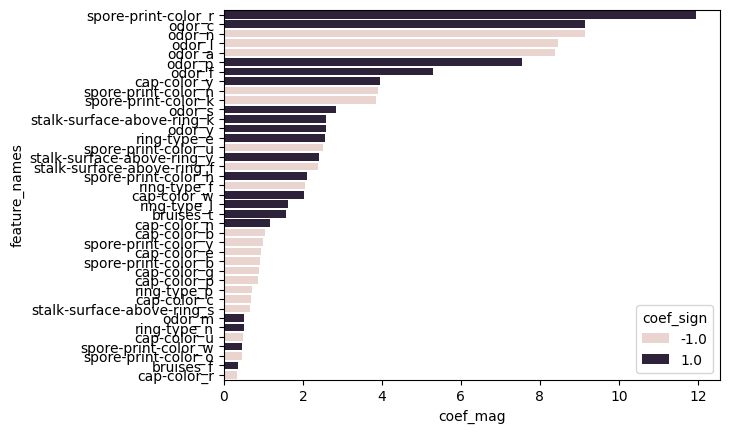

In [ ]:
  vip_2 = grid_search_2.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_2.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_2})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
ring-type_l,2.364001,2.364001,1.0
habitat_u,2.101320,2.101320,1.0
habitat_w,-1.916982,1.916982,-1.0
stalk-color-above-ring_g,-1.714764,1.714764,-1.0
stalk-surface-below-ring_k,1.626031,1.626031,1.0
ring-type_p,-1.436954,1.436954,-1.0
stalk-color-above-ring_o,-1.425386,1.425386,-1.0
habitat_g,-1.142162,1.142162,-1.0
habitat_p,1.024949,1.024949,1.0


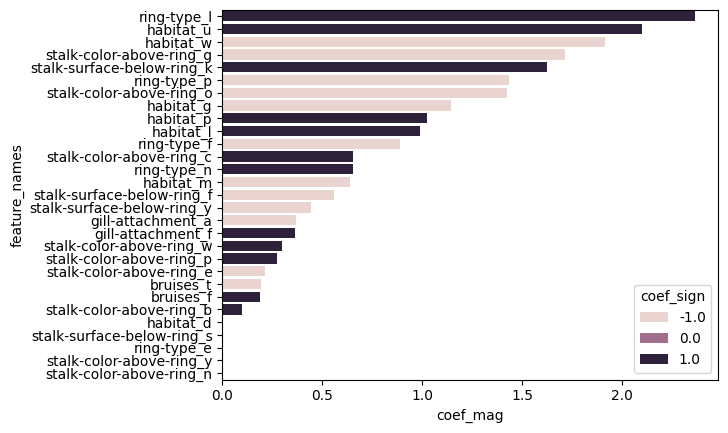

In [ ]:
vip_3 = grid_search_3.best_estimator_['mdl'].coef_[0]

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_3.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_3})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
odor_l,-14.545103,14.545103,-1.0
odor_a,-14.402359,14.402359,-1.0
odor_f,10.088396,10.088396,1.0
odor_n,-8.891752,8.891752,-1.0
odor_c,7.769114,7.769114,1.0
population_c,7.452487,7.452487,1.0
habitat_w,-7.104419,7.104419,-1.0
odor_p,6.768569,6.768569,1.0
odor_s,5.889672,5.889672,1.0


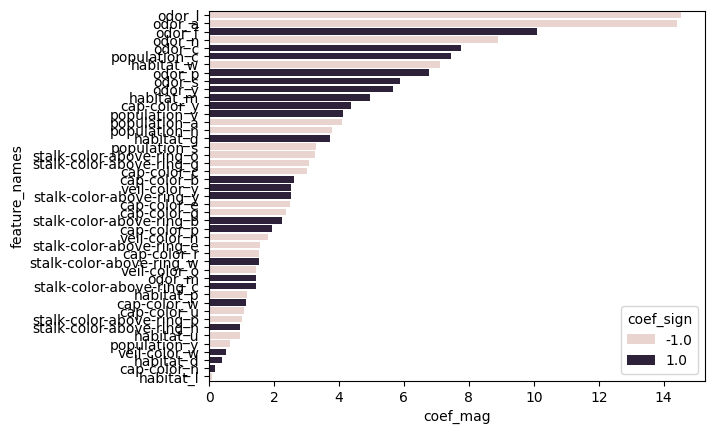

In [ ]:
vip_4 = grid_search_4.best_estimator_['mdl'].coef_[0]
# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_4.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_4})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
display(coef_info)

,vip,coef_mag,coef_sign
feature_names,,,
spore-print-color_h,11.655325,11.655325,1.0
stalk-surface-below-ring_f,-9.691712,9.691712,-1.0
spore-print-color_u,-7.865731,7.865731,-1.0
stalk-color-above-ring_g,-6.454626,6.454626,-1.0
stalk-color-below-ring_g,-5.767005,5.767005,-1.0
stalk-color-below-ring_c,5.102172,5.102172,1.0
stalk-color-above-ring_c,5.102172,5.102172,1.0
population_n,-4.958596,4.958596,-1.0
population_v,4.869415,4.869415,1.0


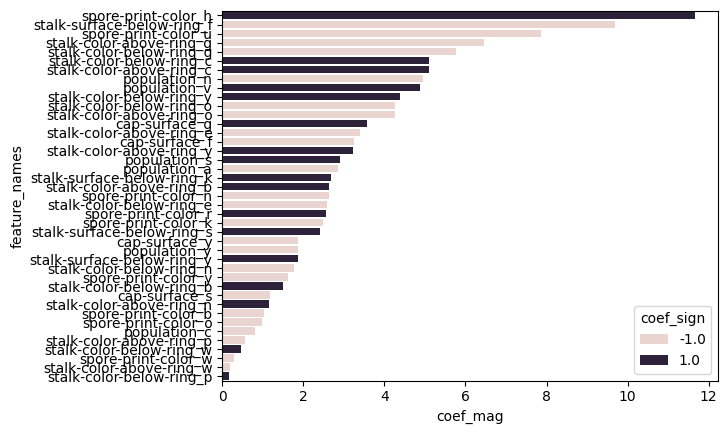

In [ ]:
  vip_5 = grid_search_5.best_estimator_['mdl'].coef_[0]

  # get back the categorical features' original categories - recall that index 0 had the cat_pipe
  cat_names = grid_search_5.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names_out()

  # score coefficients into a new dataframe
  coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names]), 'vip': vip_5})

  # get sign and magnitude of the weights (coefs)
  coef_info = coef_info.assign(coef_mag = abs(coef_info['vip']),
                             coef_sign = np.sign(coef_info['vip']))

  # sort the coef_info dataframe and plot with a barplot!
  coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
  sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);
  display(coef_info)

### Testing MultinomialNB Model

#### Testing model

In [75]:
mnb = MultinomialNB()
k = mnb.fit(X_train_1, y_train_1)
y_pred_1 = mnb.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           e       0.94      1.00      0.97      1403
           p       1.00      0.93      0.96      1305

    accuracy                           0.97      2708
   macro avg       0.97      0.96      0.97      2708
weighted avg       0.97      0.97      0.97      2708



The precision, recall, and F1-score for the "edible" (e) and "poisonous" (p) classes are quite high, indicating good performance of the Multinomial Naive Bayes model before hyperparameter tuning:

- For the "edible" class:

  - Precision (ability of the classifier not to label as positive a sample that is negative): 0.94
  - Recall (ability of the classifier to find all the positive samples): 1.00
  - F1-score (harmonic mean of precision and recall): 0.97
- For the "poisonous" class:

  - Precision: 1.00
  - Recall: 0.93
  - F1-score: 0.96
  
The overall accuracy of the model is 97%, indicating that it correctly classifies the majority of the samples. The macro and weighted average F1-scores are also high, indicating balanced performance across both classes.

Before hyperparameter tuning, the model already demonstrates strong performance in distinguishing between edible and poisonous mushrooms. With further optimization through hyperparameter tuning, it is possible to further improve the model's performance metrics.

#### Hypertuning

In [89]:
hyperparameters = {
    'alpha'     : [0.5, 1.0, 1.5, 2.0, 5],
    'fit_prior' : [True, False],
}
estimator = MultinomialNB()
best_model_multinominal_nb = get_best_model(estimator, hyperparameters, X_train_1, y_train_1)

Best parameters: alpha: 0.5, fit_prior: False


In [94]:
evaluate_model(best_model_multinominal_nb.best_estimator_, 'multinominal_nb', X_train_1, y_train_1)

Accuracy score: 0.982274741506647


#### Establishing Pipeline

In [20]:
# Define the pipeline with preprocessing and OneHotEncoder and model
pipe = Pipeline(steps=[
    ('preprocessor', preproc),  # Preprocessing steps
    ('mdl', MultinomialNB())
])


with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-color', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('mdl', MultinomialNB())])

In [21]:
pipe_1 = Pipeline(steps=[('preproc', preproc_1),
                         ('mdl', MultinomialNB())])

pipe_2 = Pipeline(steps=[('preproc', preproc_2),
                         ('mdl', MultinomialNB())])

pipe_3 = Pipeline(steps=[('preproc', preproc_3),
                         ('mdl', MultinomialNB())])

pipe_4 = Pipeline(steps=[('preproc', preproc_4),
                         ('mdl', MultinomialNB())])

pipe_5 = Pipeline(steps=[('preproc', preproc_5),
                         ('mdl', MultinomialNB())])


#### Cross Validation and hyperparameter tuning

In [22]:
tuning_grid = {
    'mdl__alpha'     : [0.5, 1.0, 1.5, 2.0, 5],
    'mdl__fit_prior' : [True, False] }
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True)
tuning_grid

{'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5], 'mdl__fit_prior': [True, False]}

In [23]:
grid_search_1 = GridSearchCV(pipe_1, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_2 = GridSearchCV(pipe_2, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_3 = GridSearchCV(pipe_3, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_4 = GridSearchCV(pipe_4, param_grid = tuning_grid, cv = 5, return_train_score=True)

grid_search_5 = GridSearchCV(pipe_5, param_grid = tuning_grid, cv = 5, return_train_score=True)

fs_gs = [grid_search_1, grid_search_2, grid_search_3, grid_search_4, grid_search_5]

In [24]:
grid_search_1.fit(X_train_1, y_train_1)
grid_search_2.fit(X_train_2, y_train_2)
grid_search_3.fit(X_train_3, y_train_3)
grid_search_4.fit(X_train_4, y_train_4)
grid_search_5.fit(X_train_5, y_train_5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot_cat',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['stalk-surface-below-ring',
                                                                          'spore-print-color',
                                                                          'stalk-color-above-ring',
                                                                          'population',
                                                                          'cap-surface',
                                                                          'stalk-color-below-ring'])])),
                                       ('mdl', MultinomialNB())]),
             param_grid={'mdl__alpha': [0.5, 1.0, 1.5, 2.0, 5],
                         'mdl__fit_prior': [True, False]},
             return_train_score=True)

In [25]:
count = 1
for item in fs_gs:
  print("Feature Set "+ str(count) +" best score:")
  print(item.best_score_)
  print(item.best_params_)
  count += 1

Feature Set 1 best score:
0.9772905997758038
{'mdl__alpha': 0.5, 'mdl__fit_prior': False}
Feature Set 2 best score:
0.9658433080175677
{'mdl__alpha': 0.5, 'mdl__fit_prior': False}
Feature Set 3 best score:
0.8661359896147438
{'mdl__alpha': 0.5, 'mdl__fit_prior': True}
Feature Set 4 best score:
0.9874441639153234
{'mdl__alpha': 0.5, 'mdl__fit_prior': True}
Feature Set 5 best score:
0.9106368806070332
{'mdl__alpha': 0.5, 'mdl__fit_prior': True}


#### Final Fit

In [26]:
best_estimators = [
    grid_search_1.best_estimator_,
    grid_search_2.best_estimator_,
    grid_search_3.best_estimator_,
    grid_search_4.best_estimator_,
    grid_search_5.best_estimator_]

### Comparing Models:

- The Decision Tree and Linear Regression models achieved perfect precision, recall, F1-score, and accuracy, indicating flawless performance on the evaluation dataset.

- The Multinomial Naive Bayes model performed slightly better than the Categorical Naive Bayes model in terms of precision and recall for the 'p' class (poisonous mushrooms), resulting in a higher F1-score and accuracy.

- Both Naive Bayes models (Multinomial and Categorical) showed strong performance but require further work to resolve issues with tuning grids, which would allow for the optimization of hyperparameters and potentially further improve their performance.

In summary, while the Decision Tree and Linear Regression models demonstrated perfect classification performance, there is still room for improvement in the tuning of the Naive Bayes models to potentially enhance their performance.